In [1]:
%pip install prince


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#libraries
import pandas as pd 
import numpy as np
import pip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import random
import itertools

from scipy.stats import shapiro, spearmanr, mannwhitneyu, kruskal
from decimal import Decimal

# Data collectin and initial check

Load the csv file into a pandas dataframe and check the variable types.

In [3]:
path = "./dataset_project_eHealth20252026.csv"
dataset = pd.read_csv(path)
dataset.head(5)

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        220 non-null    float64
 1   gender     221 non-null    int64  
 2   education  220 non-null    float64
 3   marital    220 non-null    float64
 4   income     221 non-null    int64  
 5   audit_1    221 non-null    int64  
 6   audit_2    221 non-null    int64  
 7   audit_3    220 non-null    float64
 8   audit_4    221 non-null    int64  
 9   audit_5    220 non-null    float64
 10  audit_6    221 non-null    int64  
 11  audit_7    220 non-null    float64
 12  audit_8    220 non-null    float64
 13  audit_9    220 non-null    float64
 14  audit_10   219 non-null    float64
 15  dast_1     221 non-null    int64  
 16  dast_2     219 non-null    float64
 17  dast_3     220 non-null    float64
 18  dast_4     221 non-null    int64  
 19  dast_5     220 non-null    float64
 20  dast_6    

In [5]:
df = pd.DataFrame(dataset) #dataframe creation

In [6]:
print("Elenco colonne del dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}: {col}")

Elenco colonne del dataset:
01: age
02: gender
03: education
04: marital
05: income
06: audit_1
07: audit_2
08: audit_3
09: audit_4
10: audit_5
11: audit_6
12: audit_7
13: audit_8
14: audit_9
15: audit_10
16: dast_1
17: dast_2
18: dast_3
19: dast_4
20: dast_5
21: dast_6
22: dast_7
23: dast_8
24: dast_9
25: dast_10
26: pgsi_1
27: pgsi_2
28: pgsi_3
29: pgsi_4
30: pgsi_5
31: pgsi_6
32: pgsi_7
33: pgsi_8
34: pgsi_9
35: iat_1
36: iat_2
37: iat_3
38: iat_4
39: iat_5
40: iat_6
41: iat_7
42: iat_8
43: iat_9
44: iat_10
45: iat_11
46: iat_12
47: iat_13
48: iat_14
49: iat_15
50: iat_16
51: iat_17
52: iat_18
53: iat_19
54: iat_20
55: pcl5_1
56: pcl5_2
57: pcl5_3
58: pcl5_4
59: pcl5_5
60: pcl5_6
61: pcl5_7
62: pcl5_8
63: pcl5_9
64: pcl5_10
65: pcl5_11
66: pcl5_12
67: pcl5_13
68: pcl5_14
69: pcl5_15
70: pcl5_16
71: pcl5_17
72: pcl5_18
73: pcl5_19
74: pcl5_20
75: mspss_1
76: mspss_2
77: mspss_3
78: mspss_4
79: mspss_5
80: mspss_6
81: mspss_7
82: mspss_8
83: mspss_9
84: mspss_10
85: mspss_11
86: mspss

The dataset has 221 rows and 96 columns.

# Data cleaning

Check for duplicated rows and delete them.

In [7]:
df.duplicated() #check for duplicated rows and delete them

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Length: 221, dtype: bool

In [8]:
df = df.drop_duplicates()

In [9]:
df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


The deleted rows are 21, the dataset has 200 rows and 96 columns and it is saved in a new dataset named new_df.

In [10]:
new_df = df.copy()

## Handling missing values

The dataset contains some missing values. These are not necessarily due to data collection errors — in some cases, they result from the questionnaire structure (skip logic), where certain responses are implicitly determined by previous answers. Therefore, the missing data are assumed to follow a "Missing At Random" (MAR) mechanism rather than being "Missing Completely At Random" (MCAR). 
However, for analytical purposes, we treat them as completely random, assuming no systematic bias is introduced.
Imputation Strategy:
- Categorical variables  -> mode
- Binary variables (0/1) -> mode
- Continuous / Likert-scale variables -> mean if |skew| <= 0.5, else median
- Label columns are excluded from imputation

This approach helps preserve data consistency while minimizing distortion in the overall distribution. Before imputation, null-like string values are normalized to ensure correct detection and replacement.

Replace all different representations of missing or empty values in the DataFrame (e.g., empty strings, "NA", "N/A", "nan", "missing", None, etc.) with a consistent NaN value recognized by pandas for easier data cleaning and analysis.

In [11]:
new_df = new_df.replace(
    ["", " ", "NA", "N/A", "na", "NaN", "nan", "missing", "None", None, pd.NaT, pd.NA],
    np.nan
)

In [12]:
# helper function to safely get the mode of a series, returning NaN if no mode found
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else np.nan

# 1) define known groups of columns
label_cols = [c for c in new_df.columns if c.endswith("_label") or c.endswith("_labels")]
cat_code_cols = [c for c in ["gender", "education", "marital"] if c in new_df.columns]
binary_cols = [c for c in new_df.columns if c.startswith("dast_")]  # DAST columns are binary 0/1
# automatically add any other columns that are 0/1 and not already classified
for c in new_df.columns:
    if c in binary_cols or c in label_cols:
        continue
    vals = pd.to_numeric(new_df[c], errors="coerce")
    uniq = set(vals.dropna().unique())
    if uniq.issubset({0, 1}) and c not in binary_cols:
        binary_cols.append(c)

# 2) convert columns to numeric where needed (skip labels and categorical coded columns)
numeric_candidates = [c for c in new_df.columns if c not in label_cols]
for c in numeric_candidates:
    new_df[c] = pd.to_numeric(new_df[c], errors="coerce")

# 3) count missing values before imputation
nan_before = new_df.isna().sum().to_dict()
decisions = []

# 4) imputations
# 4a) for categorical coded columns -> fill missing values with mode
for c in cat_code_cols:
    if c in new_df.columns:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (categorical)"))

# 4b) for binary columns (DAST + other auto-detected 0/1) -> fill missing with mode
for c in binary_cols:
    if c in new_df.columns and c not in cat_code_cols:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (binary)"))

# 4c) for all other numeric columns -> fill missing with mean or median based on skewness
for c in new_df.columns:
    if c in label_cols or c in cat_code_cols or c in binary_cols:
        continue
    # consider only real numeric columns
    if not pd.api.types.is_numeric_dtype(new_df[c]):
        continue
    s = new_df[c].dropna()
    if s.empty:
        continue
    skew = s.skew()  # Pandas skewness (Fisher-Pearson)
    if np.isfinite(skew) and abs(skew) <= 0.5:
        fill_val = s.mean()
        method = "mean (|skew|<=0.5)"
    else:
        fill_val = s.median()
        method = "median (|skew|>0.5)"
    new_df[c] = new_df[c].fillna(fill_val)
    decisions.append((c, f"{method}; skew={skew:.2f}"))

# 5) count missing values after imputation and calculate how many were replaced
nan_after = new_df.isna().sum().to_dict()
fixed_per_col = {c: int(nan_before.get(c,0) - nan_after.get(c,0)) for c in new_df.columns}

print("=== Imputation decisions (first 30) ===")
for name, how in decisions[:30]:
    print(f"{name:>20} -> {how}")

print("\n=== NaN replaced per column (top 20) ===")
for col, nfix in sorted(fixed_per_col.items(), key=lambda x: x[1], reverse=True)[:20]:
    if nfix > 0:
        print(f"{col:>20}: {nfix}")

print("\nTotale NaN sostituiti:", sum(fixed_per_col.values()))


=== Imputation decisions (first 30) ===
              gender -> mode (categorical)
           education -> mode (categorical)
             marital -> mode (categorical)
              dast_1 -> mode (binary)
              dast_2 -> mode (binary)
              dast_3 -> mode (binary)
              dast_4 -> mode (binary)
              dast_5 -> mode (binary)
              dast_6 -> mode (binary)
              dast_7 -> mode (binary)
              dast_8 -> mode (binary)
              dast_9 -> mode (binary)
             dast_10 -> mode (binary)
                 age -> mean (|skew|<=0.5); skew=0.11
              income -> median (|skew|>0.5); skew=1.05
             audit_1 -> median (|skew|>0.5); skew=1.19
             audit_2 -> median (|skew|>0.5); skew=1.04
             audit_3 -> median (|skew|>0.5); skew=1.11
             audit_4 -> median (|skew|>0.5); skew=1.17
             audit_5 -> median (|skew|>0.5); skew=1.05
             audit_6 -> median (|skew|>0.5); skew=1.12
            

In [13]:
new_df.isna().sum()

age          0
gender       0
education    0
marital      0
income       0
            ..
who5_1       0
who5_2       0
who5_3       0
who5_4       0
who5_5       0
Length: 96, dtype: int64

The imputation results show that categorical coded columns such as "gender," "education," and "marital" were filled with their mode values, which is a common and effective approach for categorical missing data. Binary columns (mostly dast_1 to dast_10) were also imputed using the mode, reflecting their binary nature and ensuring logical consistency.

For numeric columns, the code selected the imputation method based on skewness:

Columns with low skewness (|skew| ≤ 0.5), such as "age," are imputed using the mean.

Columns with higher skewness (|skew| > 0.5), such as "income," "audit_1" to "audit_10," and "pgsi_1" to "pgsi_5," are imputed using the median. Median imputation is more robust to outliers and skewed distributions, providing more reliable substitution for missing values in such cases.

The number of missing values replaced per column varies, with some columns having only a few NaNs filled, totaling 73 replacements overall.

In [14]:
new_df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


# EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a crucial first step in any data analysis or statistical study. EDA involves summarizing and visualizing key characteristics of variables to understand their distributions, detect patterns. In EDA, it is essential to distinguish between continuous and categorical variables, as each type requires different analytical strategies and visualizations. 
- Continuous variables (such as age and income) are summarized and explored using histograms and normality tests (e.g., Shapiro-Wilk) to assess distribution characteristics. 
- In contrast, categorical variables (such as gender, education, and marital status) are described with frequency counts and visualized using count plots or bar charts. Normality tests are not applicable to categorical variables, as these codes do not represent continuous measurements and must not be interpreted as such.

**Shapiro-Wilk test**

Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

It’s a widely-used statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation. For example, for samples larger than 5,000, the Shapiro-Wilk test with SciPy in Python still runs, but it issues a warning that the p-value may not be accurate due to limitations in the test’s underlying assumptions.

https://builtin.com/data-science/shapiro-wilk-test

# Univariate EDA

## Categorical variables

### Gender
Gender is a categorical variable represented by numeric codes (0, 1, 2, 3) that correspond to ordered categories.

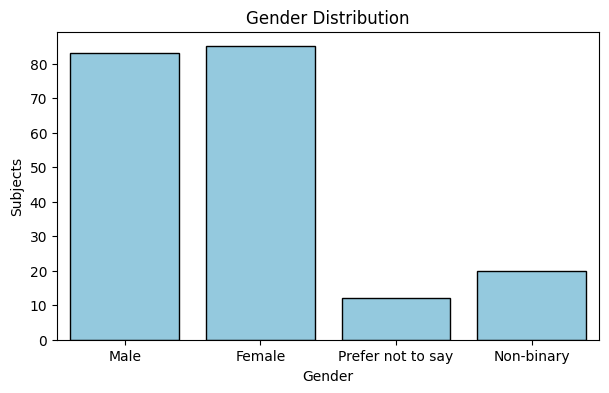

Gender counts:
gender_label
Female               85
Male                 83
Non-binary           20
Prefer not to say    12
Name: count, dtype: int64


In [15]:
#[0] Male [1] Female [2] Non-binary [3] Prefer not to say

# Replace numeric codes with labels
gender_labels = {
    0: 'Male',
    1: 'Female',
    2: 'Non-binary',
    3: 'Prefer not to say'
}
new_df['gender_label'] = new_df['gender'].map(gender_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='gender_label', color='skyblue',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Subjects')
plt.title('Gender Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print frequency counts for each gender
print("Gender counts:")
print(new_df['gender_label'].value_counts(dropna=False))

The most represented categories are Female (85) and Male (83): this suggests that outcomes related to gender can be compared between these two groups with reasonable statistical power

### Education
Education is a categorical variable represented by numeric codes (5, 8, 13, 18, 22, 25) that correspond to ordered categories.

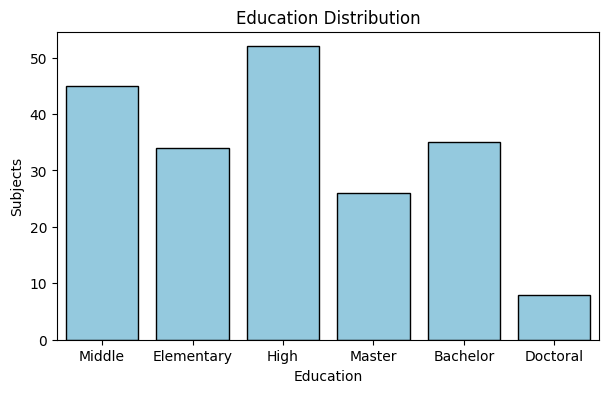

Education counts:
school_labels
High          52
Middle        45
Bachelor      35
Elementary    34
Master        26
Doctoral       8
Name: count, dtype: int64


In [16]:
#[5] Elementary school [8] Middle school [13] High School [18]Bachelor's Degree [22] Master's Degree [25] Doctoral Degree

# Replace numeric codes with labels
school_labels = {
    5: 'Elementary',
    8: 'Middle',
    13: 'High',
    18: 'Bachelor',
    22: 'Master',
    25: 'Doctoral'
}
new_df['school_labels'] = new_df['education'].map(school_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='school_labels', color='skyblue',edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Subjects')
plt.title('Education Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print frequency counts for each education level
print("Education counts:")
print(new_df['school_labels'].value_counts(dropna=False))

This distribution suggests that most participants completed either secondary (High School/Middle School) or tertiary (Bachelor’s/Master’s) education, with fewer achieving only an elementary education or the most advanced level. 

The presence of all education levels supports adequately powered comparisons for group-level analysis, although the Doctoral category has a limited sample size.

### Marital status
Marital status is a categorical variable represented by numeric codes (0, 1, 2, 3, 4, 5) that correspond to ordered categories.

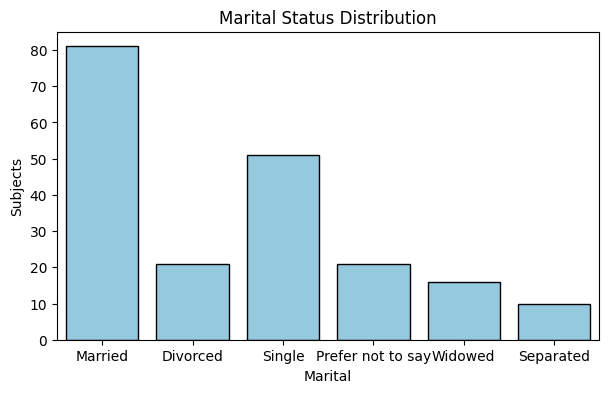

Marital status counts:
marital_labels
Married              81
Single               51
Divorced             21
Prefer not to say    21
Widowed              16
Separated            10
Name: count, dtype: int64


In [17]:
# [0] Single [1] Married [2] Divorced [3] Widowed [4] Separated [5] Prefer not to say

# Replace numeric codes with labels
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}
new_df['marital_labels'] = new_df['marital'].map(marital_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='marital_labels', color='skyblue',edgecolor='black')
plt.xlabel('Marital')
plt.ylabel('Subjects')
plt.title('Marital Status Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print category counts
print("Marital status counts:")
print(new_df['marital_labels'].value_counts(dropna=False))

The largest group is Married (81), followed by Single (51), providing a strong basis for comparisons within these groups. 
The Divorced, Widowed, Separated, and Prefer not to say categories are less frequent, which may limit subgroup analysis but still contribute valuable diversity and context.

## Numeric variables

### Age

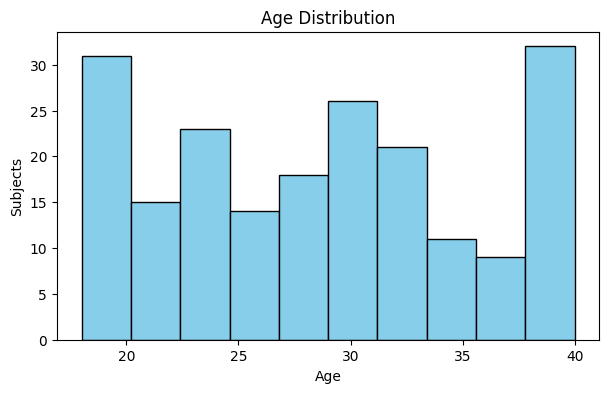

Shapiro-Wilk test statistic: 0.9423
P-value: 0.0000
The age distribution is NOT normal.


In [18]:
plt.figure(figsize=(7, 4))
plt.hist(new_df['age'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Subjects')
plt.title('Age Distribution')
plt.show()

stat, p_value = shapiro(new_df['age'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The age distribution is compatible with normality.")
else:
    print("The age distribution is NOT normal.")

There are noticeable peaks at both ends of the range, with higher counts for subjects around ages 18–20 and 39–40. The lowest frequencies occur in the mid-thirties (about 35–38)

### Income

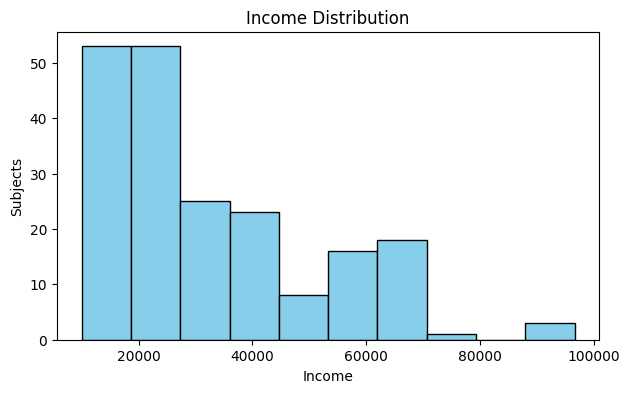

Shapiro-Wilk test statistic: 0.8894
P-value: 0.0000
The income distribution is NOT normal.


In [19]:
plt.figure(figsize=(7, 4))
plt.hist(new_df['income'], color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Subjects')
plt.title('Income Distribution')
plt.show()

stat, p_value = shapiro(new_df['income'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The income distribution is compatible with normality.")
else:
    print("The income distribution is NOT normal.")

The distribution is clearly not normal, as indicated by the strong skewness and large number of low-income subjects compared to those with higher incomes.

The Shapiro-Wilk test statistic of 0.8894 and a p-value of 0.0000 confirm this visual impression, providing strong evidence against normality.

### Psychometric tests

**Cronbach’s Alpha**

Alpha was developed by Lee Cronbach in 195111 to provide a measure of the internal consistency of a test or scale; it is expressed as a number between 0 and 1. Internal consistency describes the extent to which all the items in a test measure the same concept or construct and hence it is connected to the inter-relatedness of the items within the test. 
If the Alpha is high (above 0.7 or 0.8), it means all the questions are basically measuring the same thing, so you can trust the sum or average as a reliable score for that concept.
https://pmc.ncbi.nlm.nih.gov/articles/PMC4205511/
https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

In [20]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every relevant correlation to an array called 'r_s'. 
    # Then, we'll calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [21]:
# Make a copy to work on
df_simplified = new_df.copy()

#### IAT

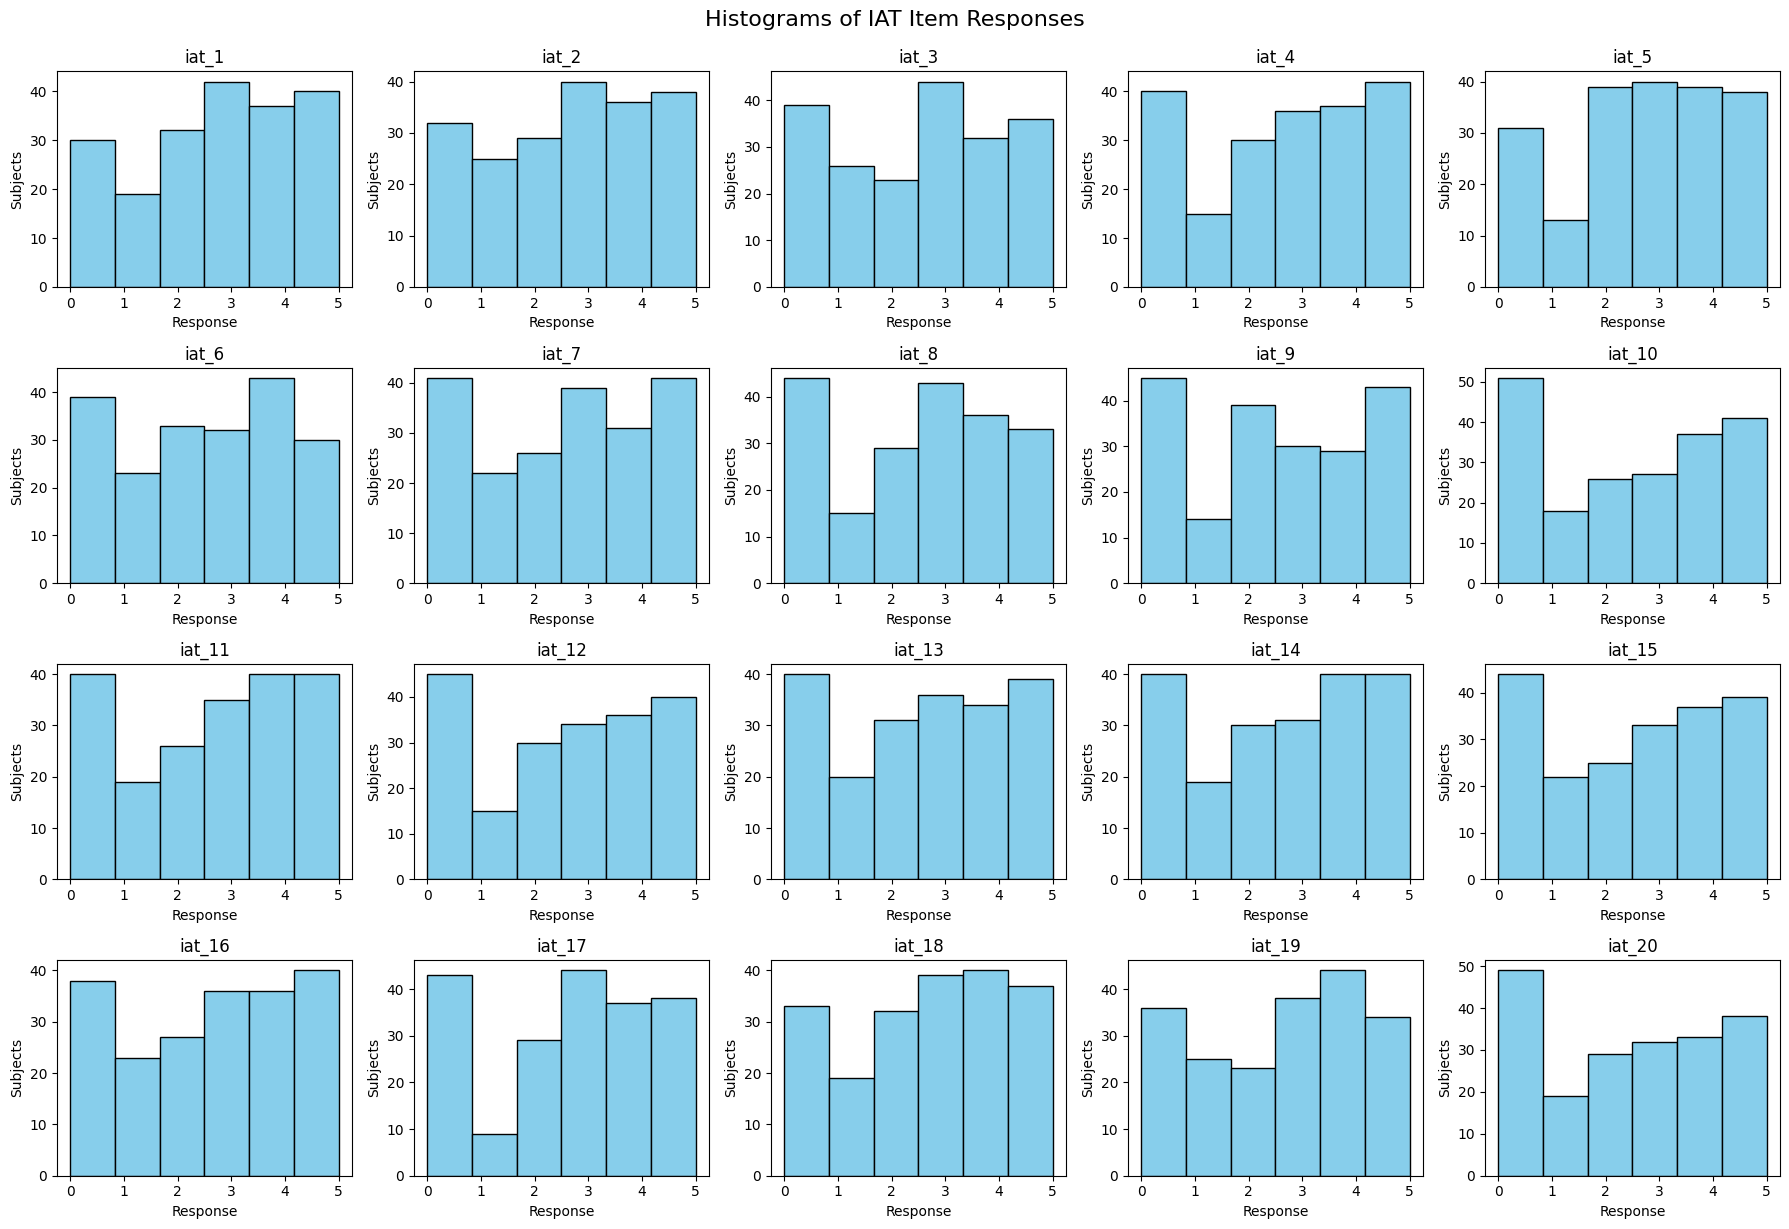

In [22]:
# Select only IAT columns
iat_item_cols = [f"iat_{i}" for i in range(1, 21)]
df_iat = df_simplified[iat_item_cols]

# Plot
n_items = len(iat_item_cols)
n_rows, n_cols = 4, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()
# Histograms for each item
for idx, col in enumerate(iat_item_cols):
    axes[idx].hist(df_simplified[col], bins=6, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of IAT Item Responses", fontsize=16, y=1.02)
plt.show()

In [23]:
df_iat.describe()

,iat_1,iat_2,iat_3,iat_4,iat_5,iat_6,iat_7,iat_8,iat_9,iat_10,iat_11,iat_12,iat_13,iat_14,iat_15,iat_16,iat_17,iat_18,iat_19,iat_20
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.783920,2.685000,2.555556,2.705000,2.783920,2.532663,2.595960,2.550505,2.565000,2.517588,2.680000,2.605000,2.605000,2.658291,2.570000,2.645000,2.683417,2.725000,2.655000,2.475000
std,1.686048,1.714782,1.757809,1.789971,1.665054,1.729928,1.801279,1.755100,1.825496,1.891117,1.795472,1.820866,1.778988,1.797211,1.828062,1.781811,1.766601,1.704082,1.741014,1.842921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [24]:
c_alpha_iat = cronbach_alpha(df_iat)
print(f"Cronbach_alpha value: {c_alpha_iat:.4f}")

Cronbach_alpha value: 0.9729


Most items show broad usage of the full response scale, with medians generally between 2 and 4, and similar variability across the scale. 
The item-wise histograms reveal that although most items capture a full range of participant responses, some items display higher or lower frequencies at different response categories, highlighting unique response patterns.

The Cronbach’s alpha for the IAT in this sample is extremely high (α = 0.97), confirming excellent internal consistency and justifying use of the total score for further analysis.

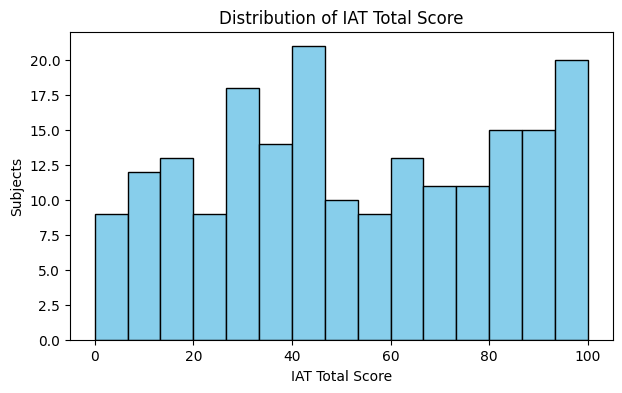

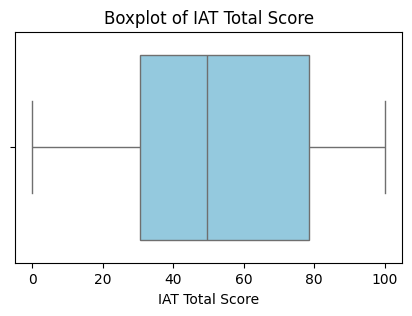

IAT total score summary statistics:
count    200.000000
mean      52.576819
std       28.821201
min        0.000000
25%       30.500000
50%       49.500000
75%       78.500000
max      100.000000
Name: iat_total, dtype: float64
Shapiro-Wilk test statistic: 0.9521
P-value: 0.0000
The IAT total score distribution significantly deviates from normality.


In [25]:
# Compute the total score
df_simplified['iat_total'] = df_simplified[iat_item_cols].sum(axis=1)

# Visualize histogram of total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['iat_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("IAT Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of IAT Total Score")
plt.show()

# Visualize boxplot of total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['iat_total'], color='skyblue')
plt.xlabel("IAT Total Score")
plt.title("Boxplot of IAT Total Score")
plt.show()

# Summary statistics
print("IAT total score summary statistics:")
print(df_simplified['iat_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['iat_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The IAT total score distribution is compatible with normality.")
else:
    print("The IAT total score distribution significantly deviates from normality.")

# Drop all IAT item columns from the new DataFrame
df_simplified = df_simplified.drop(columns=iat_item_cols)

The IAT total score demonstrates a wide range in your sample, with scores spanning from 0 to 100 and a mean of 52.6. The boxplot and histogram illustrate a non-normal, multimodal distribution—confirmed by the Shapiro-Wilk test (statistic = 0.95, p < 0.0001). Given the significant deviation from normality, non-parametric statistical methods are recommended for subsequent analyses involving the IAT total score.

Categories (Young, 1998; validation studies):

- Normal/Average user: IAT total < 40
- Problematic user: 40 ≤ IAT total < 70
- Severely problematic user: IAT total ≥ 70​

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_82211/3798497439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(categories), palette='Blues', edgecolor='black')


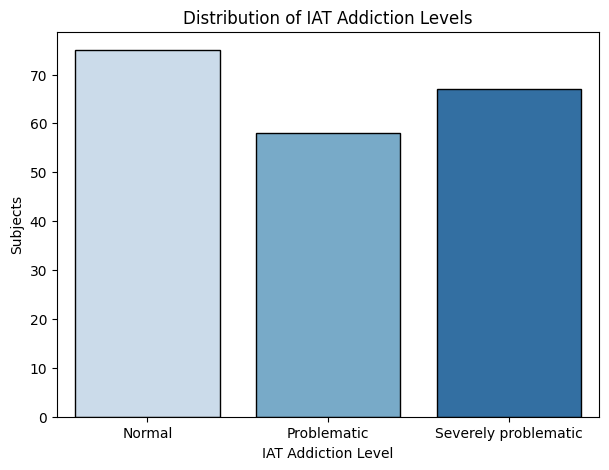

Normal                  75
Severely problematic    67
Problematic             58
Name: count, dtype: int64


In [26]:
categories = [
    "Normal" if score < 40 else
    "Problematic" if score < 70 else
    "Severely problematic"
    for score in df_simplified['iat_total']
]

plt.figure(figsize=(7, 5))
sns.countplot(x=pd.Series(categories), palette='Blues', edgecolor='black')
plt.xlabel('IAT Addiction Level')
plt.ylabel('Subjects')
plt.title('Distribution of IAT Addiction Levels')
plt.show()

# Print the counts for each category
print(pd.Series(categories).value_counts())

#### AUDIT

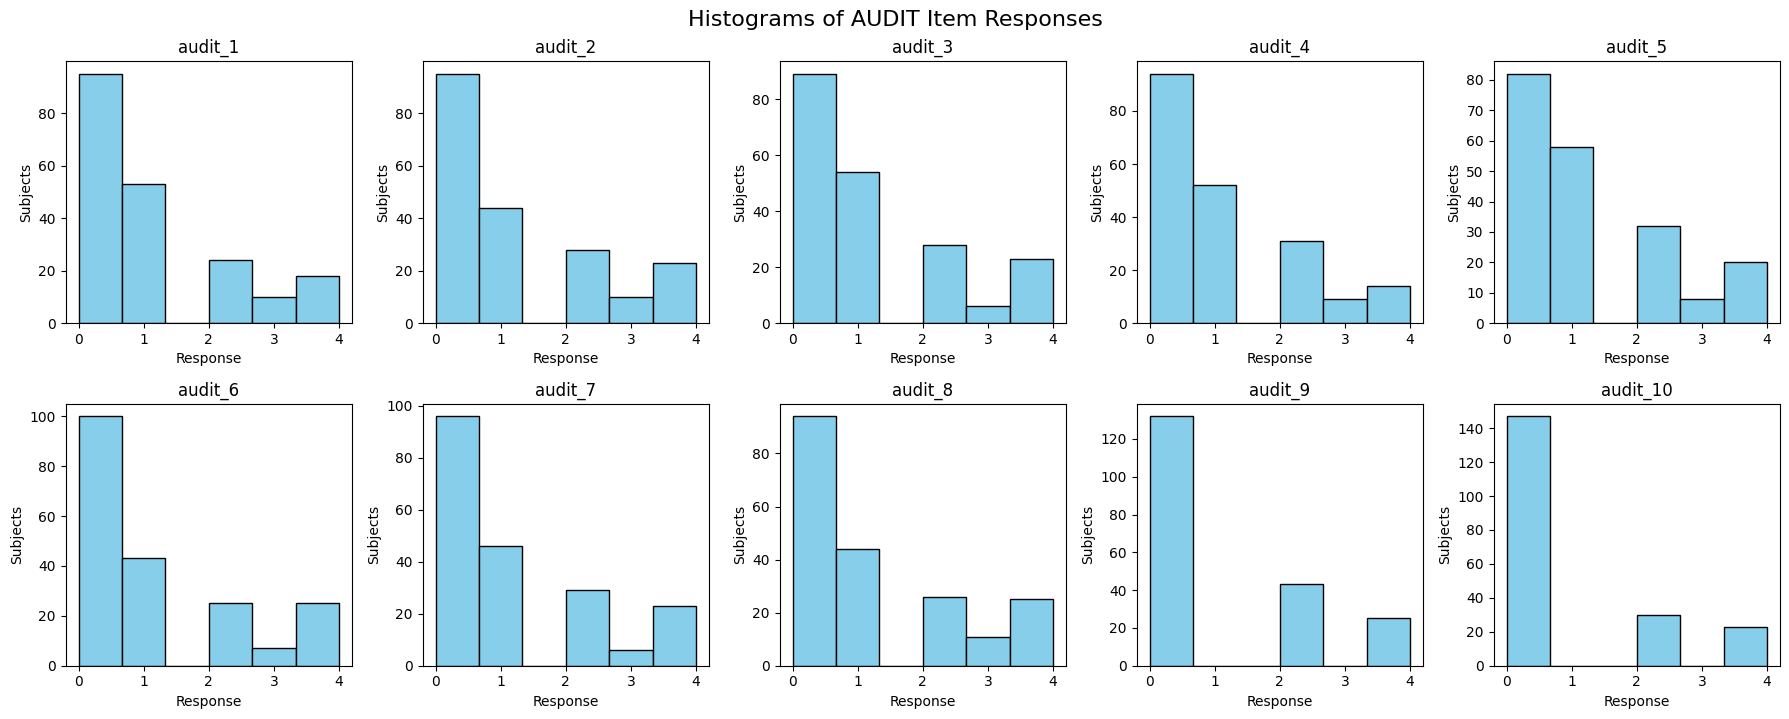

In [27]:
# Select only AUDIT columns
audit_item_cols = [f"audit_{i}" for i in range(1, 11)]
df_audit = df_simplified[audit_item_cols]  # or new_df if not already simplified

# Plot
n_items = len(audit_item_cols)
n_rows, n_cols = 2, 5  # 10 items: 2 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7))
axes = axes.flatten()
# Histograms for each AUDIT item
for idx, col in enumerate(audit_item_cols):
    axes[idx].hist(df_audit[col], bins=6, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of AUDIT Item Responses", fontsize=16, y=1.02)
plt.show()


In [28]:
df_audit.describe()

,audit_1,audit_2,audit_3,audit_4,audit_5,audit_6,audit_7,audit_8,audit_9,audit_10
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.015000,1.110000,1.100000,0.985000,1.130000,1.070000,1.070000,1.145000,0.930000,0.760000
std,1.269976,1.359094,1.318595,1.200827,1.273266,1.376435,1.335672,1.390555,1.416025,1.368122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [29]:
c_alpha_audit = cronbach_alpha(df_audit)
print(f"Cronbach_alpha value: {c_alpha_audit:.4f}")

Cronbach_alpha value: 0.9121


AUDIT items show a full range of responses, with means clustered around 1 and moderate variability. Most medians are 1 or less, consistent with population-level drinking patterns. The Cronbach's alpha is 0.91, indicating high internal consistency and supporting the use of the total score for further analysis.

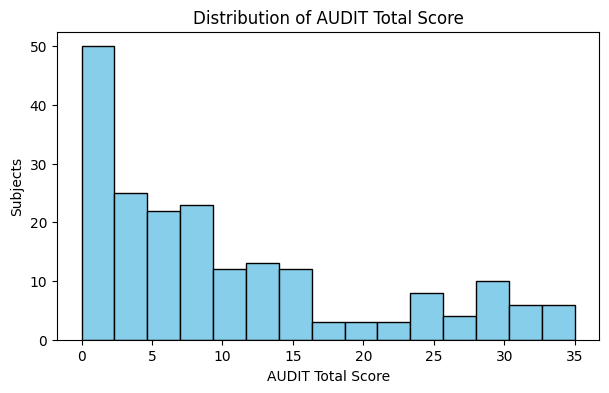

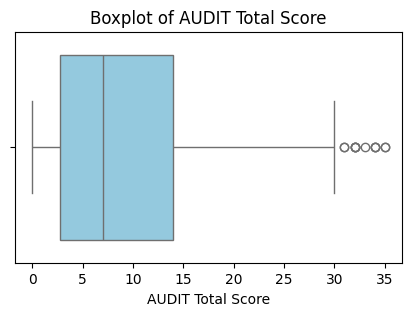

AUDIT total score summary statistics:
count    200.000000
mean      10.315000
std        9.970599
min        0.000000
25%        2.750000
50%        7.000000
75%       14.000000
max       35.000000
Name: audit_total, dtype: float64
Shapiro-Wilk test statistic: 0.8572
P-value: 0.0000
The AUDIT total score distribution significantly deviates from normality.


In [30]:
# Compute the total AUDIT score
df_simplified['audit_total'] = df_simplified[audit_item_cols].sum(axis=1)

# Visualize histogram of AUDIT total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['audit_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("AUDIT Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of AUDIT Total Score")
plt.show()

# Visualize boxplot of AUDIT total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['audit_total'], color='skyblue')
plt.xlabel("AUDIT Total Score")
plt.title("Boxplot of AUDIT Total Score")
plt.show()

# Summary statistics
print("AUDIT total score summary statistics:")
print(df_simplified['audit_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['audit_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The AUDIT total score distribution is compatible with normality.")
else:
    print("The AUDIT total score distribution significantly deviates from normality.")

# Drop all AUDIT item columns from the DataFrame
df_simplified = df_simplified.drop(columns=audit_item_cols)

The AUDIT total score demonstrates a wide range in your sample, with scores spanning from 0 to 35 and a mean of 10.3. The boxplot and histogram show a strongly right-skewed, non-normal distribution—which is confirmed by the Shapiro-Wilk test (statistic = 0.86, p < 0.0001). Given this significant deviation from normality, non-parametric statistical methods are recommended for analyses involving the AUDIT total score.

For the AUDIT scale, the most commonly used cut-offs are:
- Low risk: AUDIT total < 8
- Hazardous/harmful: 8 ≤ AUDIT total < 16
- Possible dependence: AUDIT total ≥ 16

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_82211/2498645151.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories_series, palette=sns.color_palette("Blues", n_colors=3), edgecolor='black')


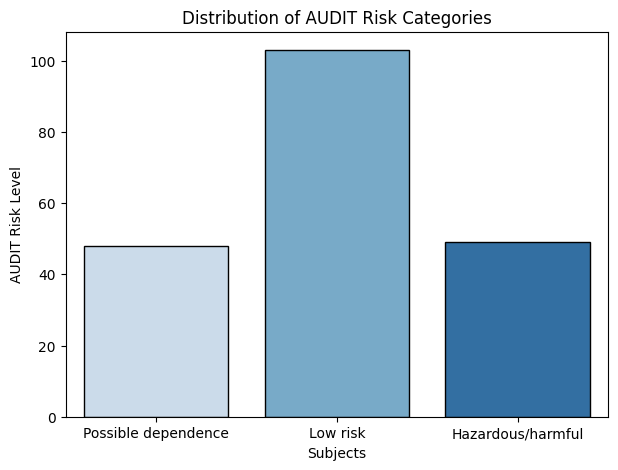

Low risk               103
Hazardous/harmful       49
Possible dependence     48
Name: count, dtype: int64


In [31]:
categories = [
    "Low risk" if score < 8 else
    "Hazardous/harmful" if score < 16 else
    "Possible dependence"
    for score in df_simplified['audit_total']
]

categories_series = pd.Series(categories, name='AUDIT Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(x=categories_series, palette=sns.color_palette("Blues", n_colors=3), edgecolor='black')
plt.xlabel('Subjects')
plt.ylabel('AUDIT Risk Level')
plt.title('Distribution of AUDIT Risk Categories')
plt.show()

# Print the counts for each category
print(pd.Series(categories).value_counts())


#### DAST

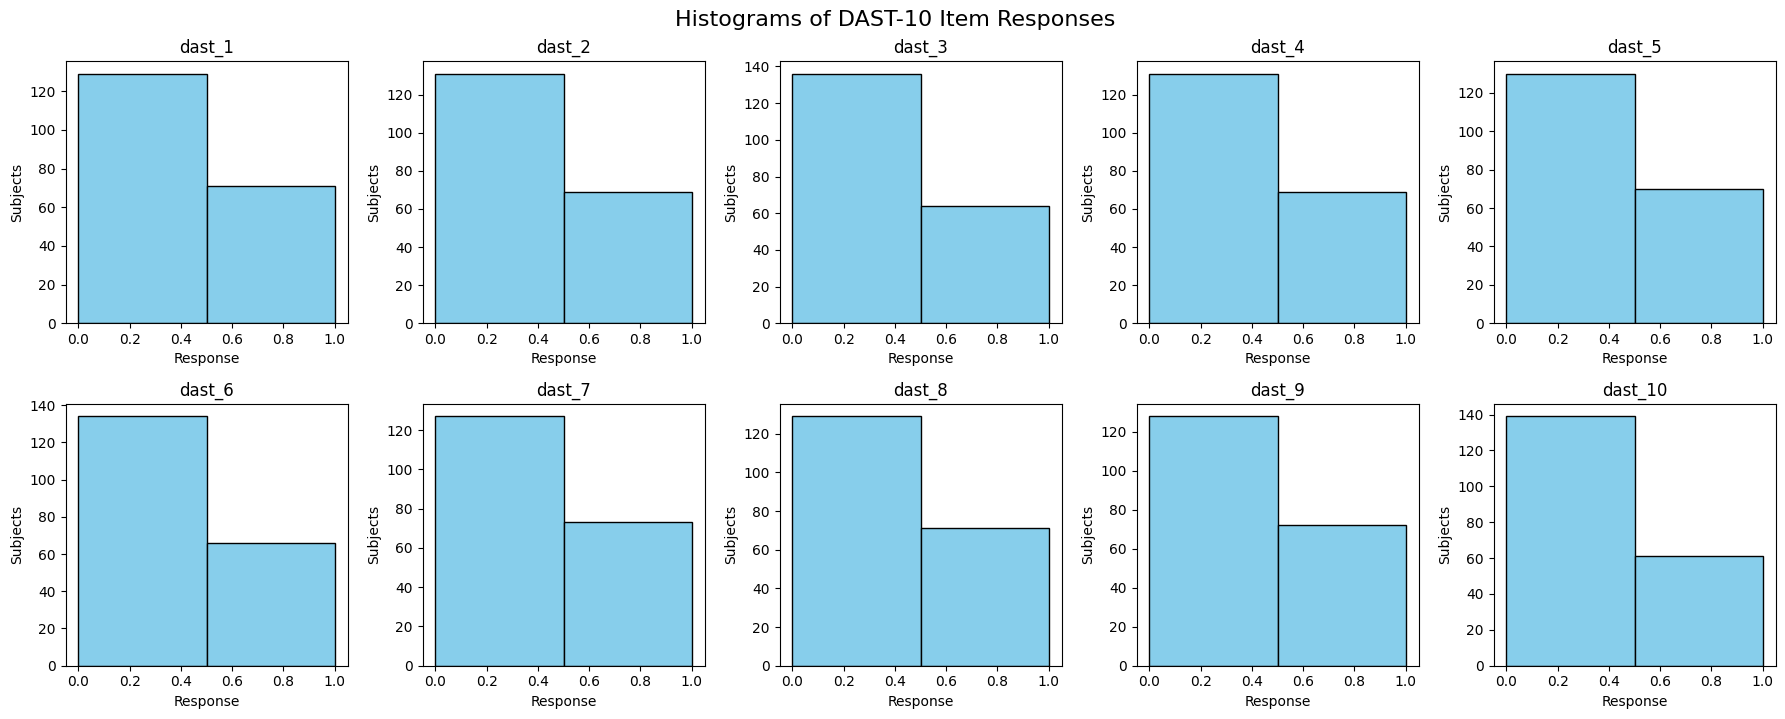

In [32]:
# Select only DAST-10 item columns
dast_item_cols = [f"dast_{i}" for i in range(1, 11)]
df_dast = df_simplified[dast_item_cols]  # or new_df if not already simplified

# Plot setup
n_items = len(dast_item_cols)
n_rows, n_cols = 2, 5  # 10 items: 2 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7))
axes = axes.flatten()

# Histograms for each DAST item
for idx, col in enumerate(dast_item_cols):
    axes[idx].hist(df_dast[col], bins=2, color='skyblue', edgecolor='black')  # DAST items are 0/1
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of DAST-10 Item Responses", fontsize=16, y=1.02)
plt.show()


In [33]:
df_dast.describe()

,dast_1,dast_2,dast_3,dast_4,dast_5,dast_6,dast_7,dast_8,dast_9,dast_10
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.355000,0.345000,0.320000,0.345000,0.350000,0.330000,0.365000,0.355000,0.360000,0.305000
std,0.479714,0.476561,0.467647,0.476561,0.478167,0.471393,0.482638,0.479714,0.481205,0.461563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
c_alpha_dast = cronbach_alpha(df_dast)
print(f"Cronbach_alpha value: {c_alpha_audit:.4f}")

Cronbach_alpha value: 0.9121


DAST-10 items show balanced use of the binary response options, with means around 0.3–0.37 and interquartile ranges from 0 to 1 for all items. This indicates that each question contributes information about the presence or absence of drug-related problems across participants. The Cronbach’s alpha of 0.91 demonstrates excellent internal consistency, consistent with published DAST-10 psychometric studies, and supports using the summed DAST-10 total score as a reliable indicator of drug abuse severity in subsequent analyses.

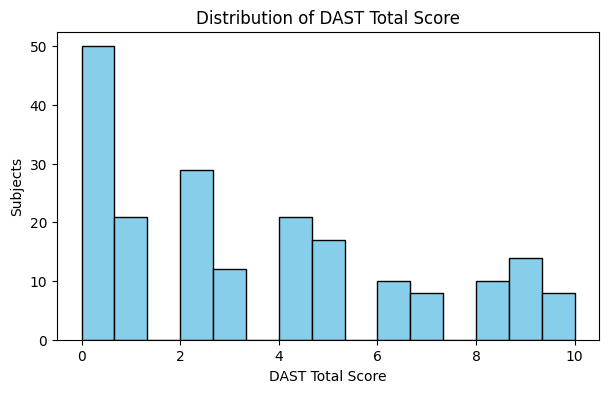

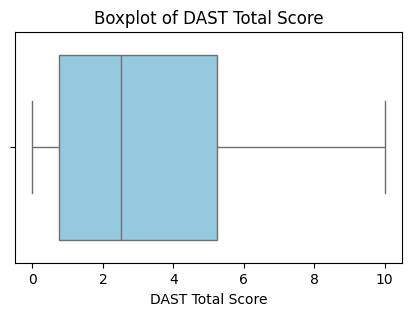

DAST total score summary statistics:
count    200.000000
mean       3.430000
std        3.153542
min        0.000000
25%        0.750000
50%        2.500000
75%        5.250000
max       10.000000
Name: dast_total, dtype: float64
Shapiro-Wilk test statistic: 0.8869
P-value: 0.0000
The DAST total score distribution significantly deviates from normality.


In [35]:
# Compute the total DAST score
df_simplified['dast_total'] = df_simplified[dast_item_cols].sum(axis=1)

# Visualize histogram of DAST total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['dast_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("DAST Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of DAST Total Score")
plt.show()

# Visualize boxplot of DAST total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['dast_total'], color='skyblue')
plt.xlabel("DAST Total Score")
plt.title("Boxplot of DAST Total Score")
plt.show()

# Summary statistics
print("DAST total score summary statistics:")
print(df_simplified['dast_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['dast_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The DAST total score distribution is compatible with normality.")
else:
    print("The DAST total score distribution significantly deviates from normality.")

# Drop all DAST item columns from the DataFrame
df_simplified = df_simplified.drop(columns=dast_item_cols)

The DAST total score in your sample ranges from 0 to 10 with a mean of 3.4, indicating generally low-to-moderate levels of drug-related problems. The histogram and boxplot reveal a markedly right-skewed distribution, with many participants scoring near 0 and fewer at higher scores. This visual pattern is confirmed by the Shapiro–Wilk test (statistic = 0.89, p < 0.0001), showing a clear deviation from normality; therefore, non-parametric methods or categorical risk levels are recommended for analyses involving the DAST total score.

Based on the DAST‑10 literature, a common categorization is:​
- 0: No problems
- 1–2: Low level
- 3–5: Moderate level
- ≥6: Severe level

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_82211/1651799925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


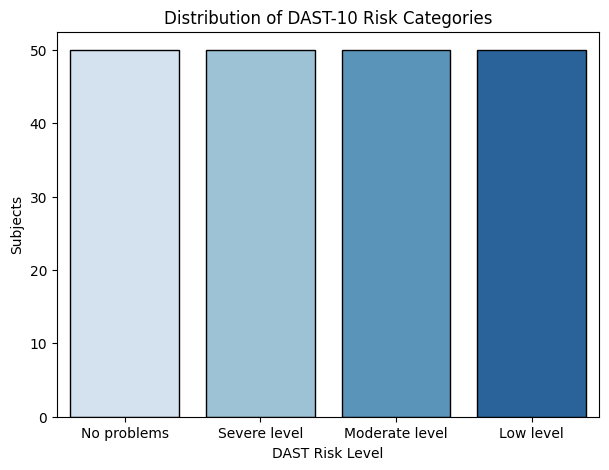

DAST Risk Level
No problems       50
Severe level      50
Moderate level    50
Low level         50
Name: count, dtype: int64


In [36]:
# Create DAST risk categories from total score (0–10)
dast_categories = [
    "No problems" if score == 0 else
    "Low level" if score <= 2 else
    "Moderate level" if score <= 5 else
    "Severe level"
    for score in df_simplified['dast_total']
]

dast_cat_series = pd.Series(dast_categories, name='DAST Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=dast_cat_series,
    palette=sns.color_palette("Blues", n_colors=4),
    edgecolor='black'
)
plt.xlabel('DAST Risk Level')
plt.ylabel('Subjects')
plt.title('Distribution of DAST-10 Risk Categories')
plt.show()

print(dast_cat_series.value_counts())


#### PGSI

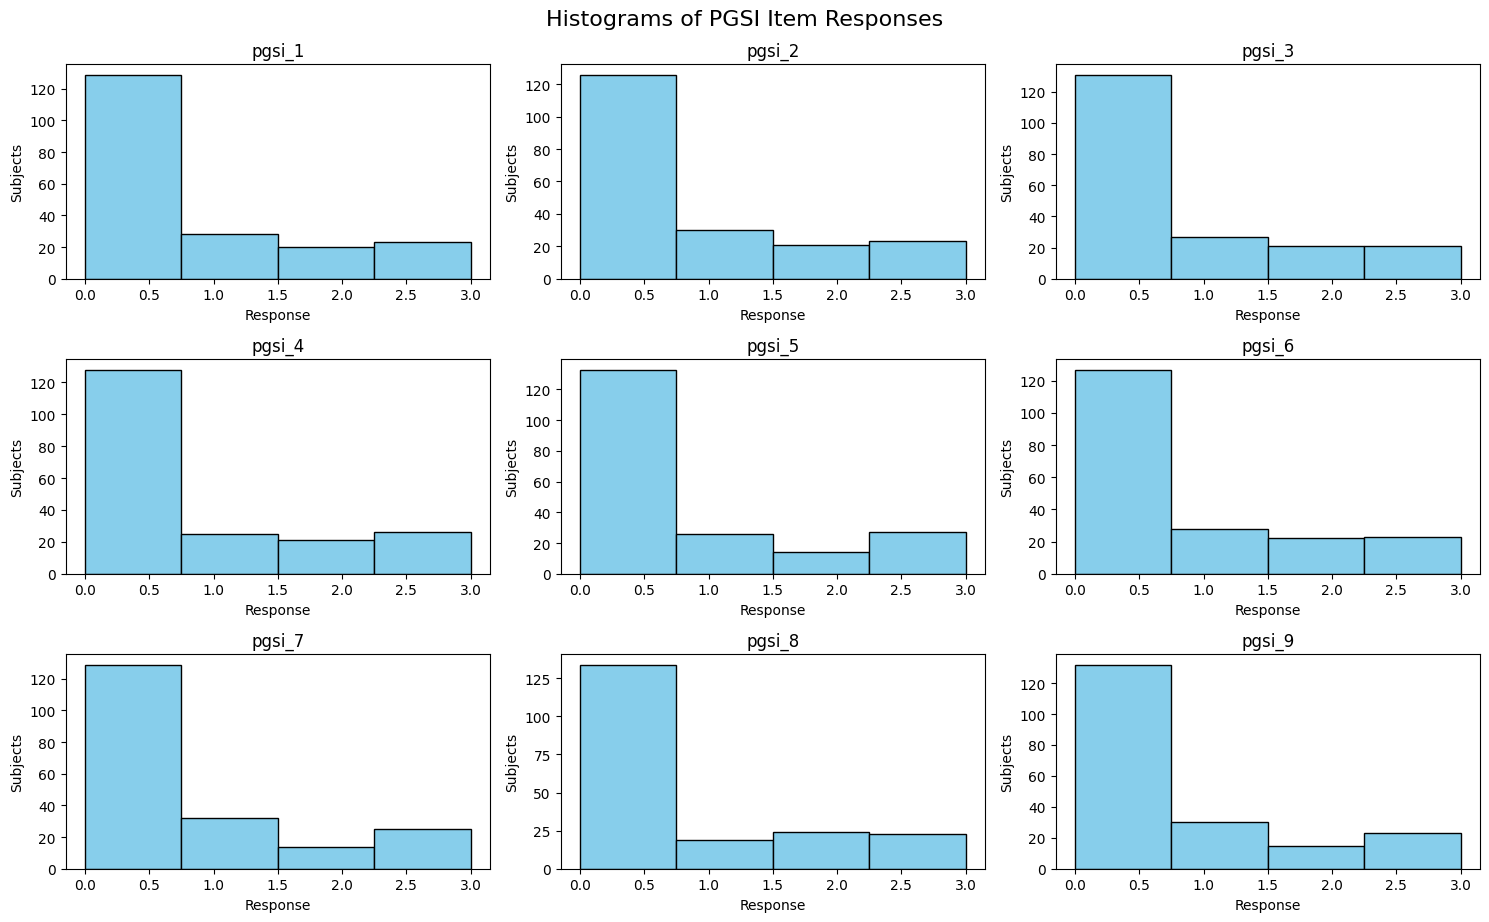

In [38]:
# Select only PGSI item columns (assuming pgsi_1 ... pgsi_9)
pgsi_item_cols = [f"pgsi_{i}" for i in range(1, 10)]
df_pgsi = df_simplified[pgsi_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(pgsi_item_cols)
n_rows, n_cols = 3, 3  # 9 items: 3 rows x 3 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9))
axes = axes.flatten()

# Histograms for each PGSI item
for idx, col in enumerate(pgsi_item_cols):
    axes[idx].hist(df_pgsi[col], bins=4, color='skyblue', edgecolor='black')  # responses 0–3
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of PGSI Item Responses", fontsize=16, y=1.02)
plt.show()


In [39]:
df_pgsi.describe()

,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,pgsi_6,pgsi_7,pgsi_8,pgsi_9
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,0.685000,0.705000,0.660000,0.725000,0.67500,0.705000,0.675000,0.680000,0.645000
std,1.054197,1.055245,1.034287,1.093321,1.08409,1.059997,1.055912,1.073949,1.036507
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000


In [40]:
c_alpha_pgsi = cronbach_alpha(df_pgsi)
print(f"Cronbach_alpha value: {c_alpha_audit:.4f}")

Cronbach_alpha value: 0.9121


The PGSI items display the expected skewed pattern for problem gambling screens: most responses cluster at 0, with progressively fewer endorsements of higher categories (1–3). Item means are all below 1, and quartiles show that at least half of the sample scores 0 on every item, indicating that gambling-related problems are relatively infrequent in this dataset. The Cronbach’s alpha of 0.91 reflects excellent internal consistency, consistent with published PGSI psychometric studies, supporting the use of the summed PGSI total score as a reliable measure of gambling problem severity in subsequent analyses.​

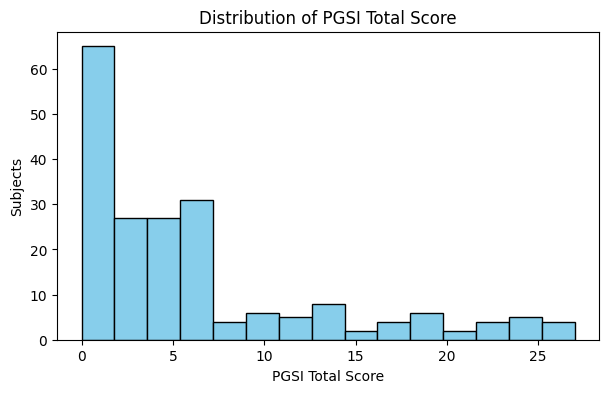

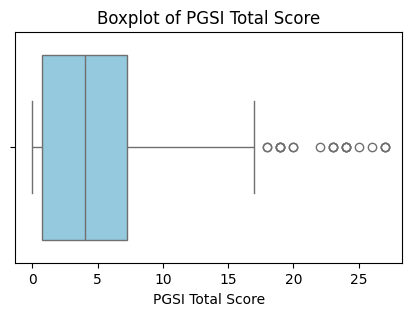

PGSI total score summary statistics:
count    200.000000
mean       6.155000
std        7.018352
min        0.000000
25%        0.750000
50%        4.000000
75%        7.250000
max       27.000000
Name: pgsi_total, dtype: float64
Shapiro-Wilk test statistic: 0.8101
P-value: 0.0000
The PGSI total score distribution significantly deviates from normality.


In [41]:
# Compute the total PGSI score
df_simplified['pgsi_total'] = df_simplified[pgsi_item_cols].sum(axis=1)

# Visualize histogram of PGSI total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['pgsi_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("PGSI Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of PGSI Total Score")
plt.show()

# Visualize boxplot of PGSI total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['pgsi_total'], color='skyblue')
plt.xlabel("PGSI Total Score")
plt.title("Boxplot of PGSI Total Score")
plt.show()

# Summary statistics
print("PGSI total score summary statistics:")
print(df_simplified['pgsi_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['pgsi_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The PGSI total score distribution is compatible with normality.")
else:
    print("The PGSI total score distribution significantly deviates from normality.")

# Drop all PGSI item columns from the DataFrame
df_simplified = df_simplified.drop(columns=pgsi_item_cols)

The PGSI total score shows a broad range from 0 to 27, with a mean of 6.2 and an interquartile range roughly between 1 and 7.3. The histogram and boxplot indicate a strongly right-skewed distribution with many low scores and a tail of higher scores, including several outliers at the upper end. The Shapiro–Wilk test (statistic = 0.81, p < 0.0001) confirms a clear deviation from normality, so non-parametric methods or PGSI risk categories should be used for subsequent analyses involving this total score.

For PGSI, standard risk categories are:
- 0: Non‑problem gambling
- 1–2: Low risk
- 3–7: Moderate risk
- ≥8: Problem gambling

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_82211/3790844576.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


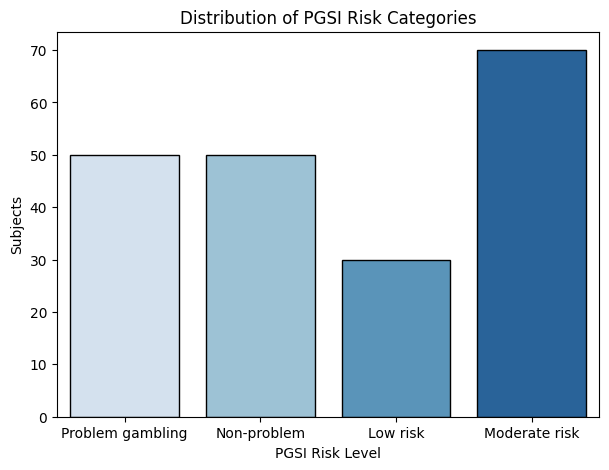

PGSI Risk Level
Moderate risk       70
Problem gambling    50
Non-problem         50
Low risk            30
Name: count, dtype: int64


In [42]:
# Create PGSI risk categories from total score (0–27)
pgsi_categories = [
    "Non-problem" if score == 0 else
    "Low risk" if score <= 2 else
    "Moderate risk" if score <= 7 else
    "Problem gambling"
    for score in df_simplified['pgsi_total']
]

pgsi_cat_series = pd.Series(pgsi_categories, name='PGSI Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=pgsi_cat_series,
    palette=sns.color_palette("Blues", n_colors=4),
    edgecolor='black'
)
plt.xlabel('PGSI Risk Level')
plt.ylabel('Subjects')
plt.title('Distribution of PGSI Risk Categories')
plt.show()

print(pgsi_cat_series.value_counts())

#### PCL5

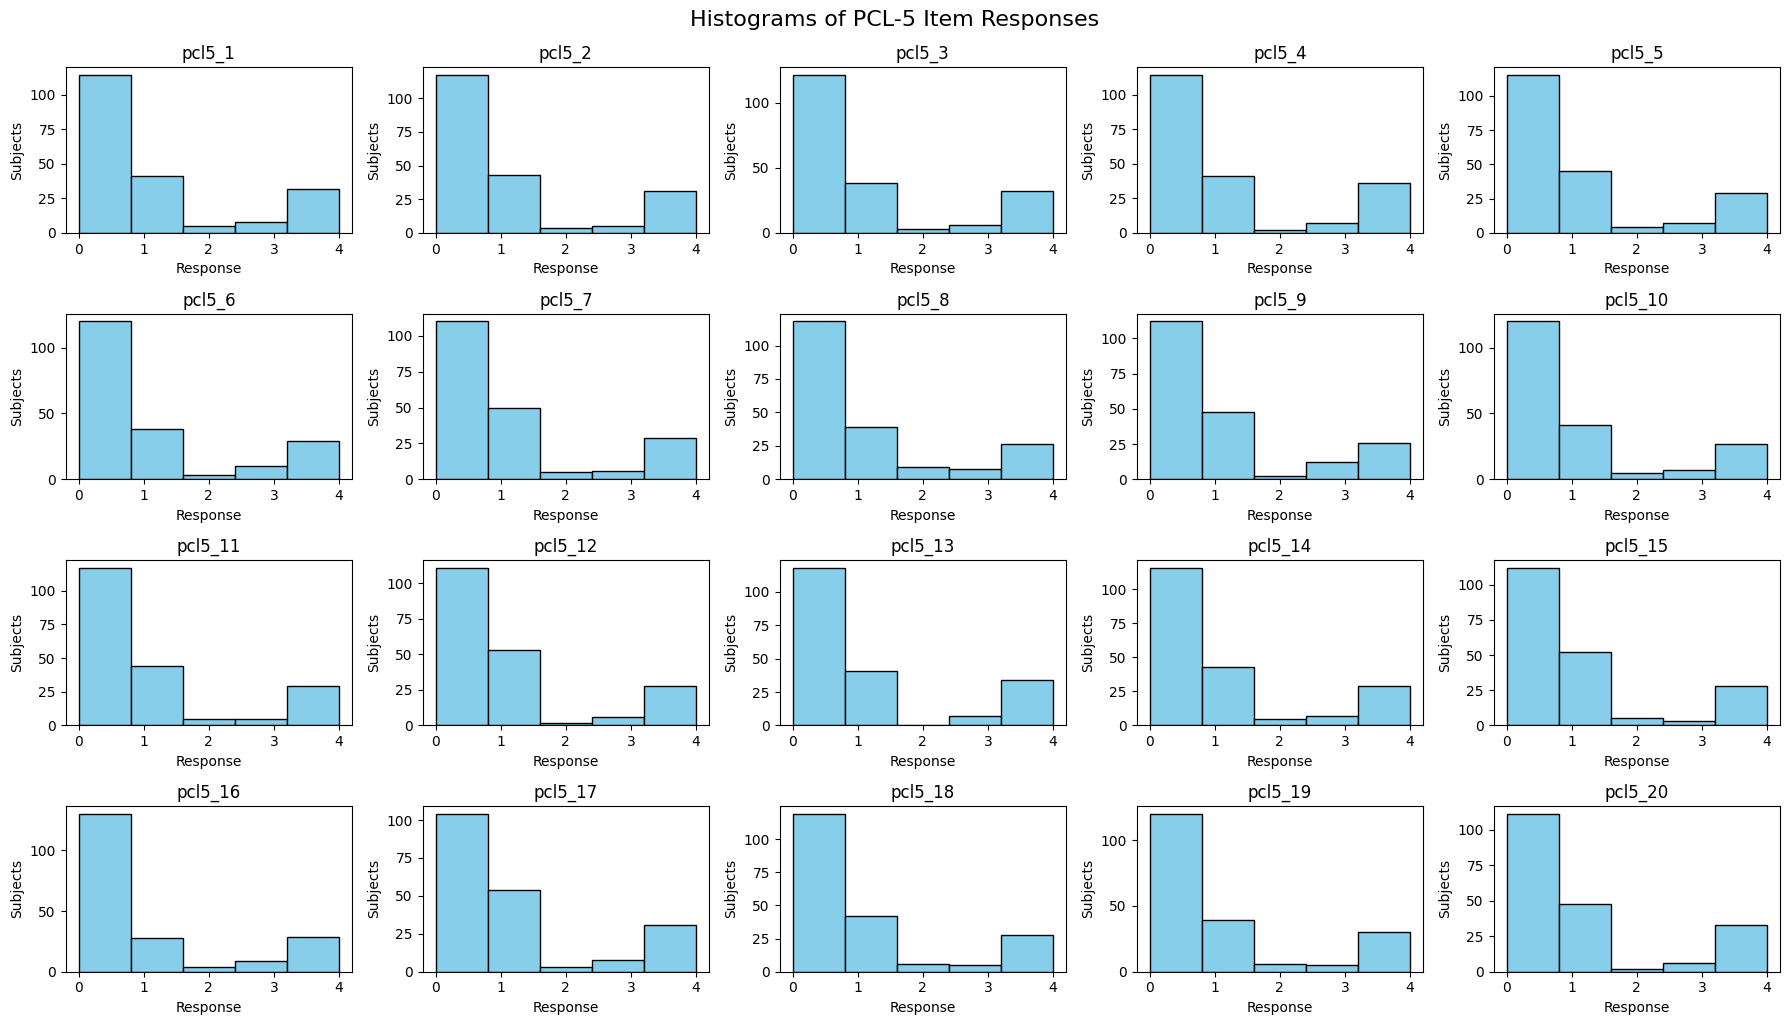

In [44]:
# Select only PCL-5 item columns
pcl5_item_cols = [f"pcl5_{i}" for i in range(1, 21)]
df_pcl5 = df_simplified[pcl5_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(pcl5_item_cols)
n_rows, n_cols = 4, 5  # 20 items: 4 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

# Histograms for each PCL-5 item
for idx, col in enumerate(pcl5_item_cols):
    axes[idx].hist(df_pcl5[col], bins=5, color='skyblue', edgecolor='black')  # responses 0–4
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of PCL-5 Item Responses", fontsize=16, y=1.02)
plt.show()

In [45]:
# Descriptive statistics
print(df_pcl5.describe())

           pcl5_1      pcl5_2      pcl5_3      pcl5_4      pcl5_5      pcl5_6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     1.015000    0.950000    0.950000    1.050000    0.950000    0.950000   
std      1.485195    1.451909    1.479338    1.532725    1.430992    1.458815   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           pcl5_7      pcl5_8      pcl5_9     pcl5_10     pcl5_11     pcl5_12  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.970000    0.925000    0.960000    0.900000    0.925000    0.935000   
std      1.417443    1.4032

In [46]:
# Cronbach's alpha for PCL-5
c_alpha_pcl5 = cronbach_alpha(df_pcl5)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.9817


PCL‑5 items show that most people in the sample chose 0 (“Not at all”) on each PCL‑5 item, and fewer people chose higher scores from 1 to 4. The average score for every item is around 1, and at least half of the participants scored 0 on each question. The Cronbach’s alpha of 0.98 shows that the 20 items are extremely consistent with each other, so the PCL‑5 total score is a very reliable measure of PTSD symptoms in this dataset, supporting the use of the summed PCL‑5 total score. 

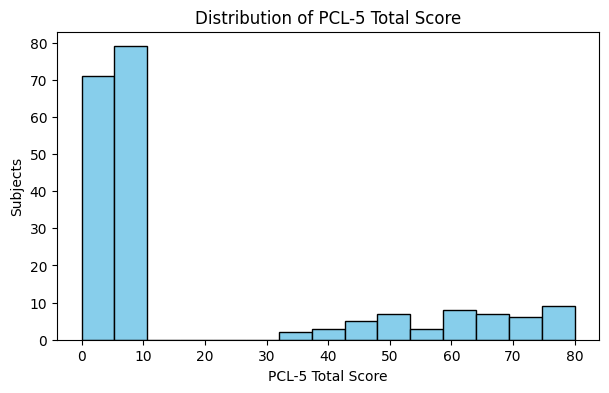

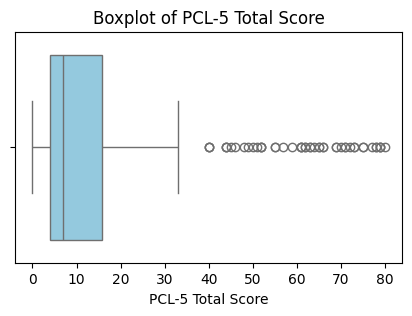

PCL-5 total score summary statistics:
count    200.000000
mean      19.115000
std       24.882877
min        0.000000
25%        4.000000
50%        7.000000
75%       15.750000
max       80.000000
Name: pcl5_total, dtype: float64
Shapiro-Wilk test statistic: 0.6864
P-value: 0.0000
The PCL-5 total score distribution significantly deviates from normality.


In [47]:
# Compute the total PCL-5 score
df_simplified['pcl5_total'] = df_simplified[pcl5_item_cols].sum(axis=1)

# Visualize histogram of PCL-5 total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['pcl5_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("PCL-5 Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of PCL-5 Total Score")
plt.show()

# Visualize boxplot of PCL-5 total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['pcl5_total'], color='skyblue')
plt.xlabel("PCL-5 Total Score")
plt.title("Boxplot of PCL-5 Total Score")
plt.show()

# Summary statistics
print("PCL-5 total score summary statistics:")
print(df_simplified['pcl5_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['pcl5_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The PCL-5 total score distribution is compatible with normality.")
else:
    print("The PCL-5 total score distribution significantly deviates from normality.")

# Drop all PCL-5 item columns from the DataFrame
df_simplified = df_simplified.drop(columns=pcl5_item_cols)


The PCL‑5 total scores range from 0 to 80, with an average of about 19 points, so most people report relatively low to moderate PTSD symptoms. The histogram and boxplot show a right‑skewed pattern: many participants score in the low range, while a smaller group has very high scores, creating a long tail and many outliers. The Shapiro–Wilk test (statistic = 0.69, p < 0.0001) confirms that the PCL‑5 total score is far from normally distributed, so non‑parametric methods or the recommended clinical cut‑off (for example, ≥33 as “probable PTSD”) should be used instead of tests that assume normality.

Each of the 20 items is scored 0–4 and summed to a total score from 0 to 80.​

A total score of 33 or higher is commonly used as a provisional PTSD diagnosis cut-off (i.e., “likely PTSD” vs “below threshold”).

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_82211/2980194543.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


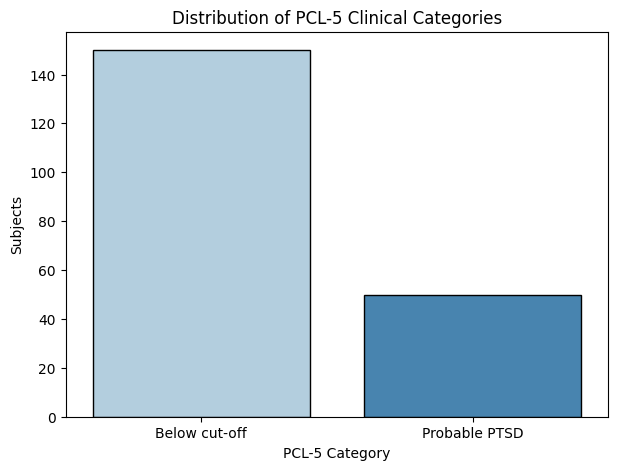

PCL-5 Category
Below cut-off    150
Probable PTSD     50
Name: count, dtype: int64


In [48]:
# PCL-5 categories based on total score (0–80)
pcl5_categories = [
    "Below cut-off" if score < 33 else
    "Probable PTSD"
    for score in df_simplified['pcl5_total']
]

pcl5_cat_series = pd.Series(pcl5_categories, name='PCL-5 Category')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=pcl5_cat_series,
    palette=sns.color_palette("Blues", n_colors=2),
    edgecolor='black'
)
plt.xlabel('PCL-5 Category')
plt.ylabel('Subjects')
plt.title('Distribution of PCL-5 Clinical Categories')
plt.show()

print(pcl5_cat_series.value_counts())

#### MSPSS

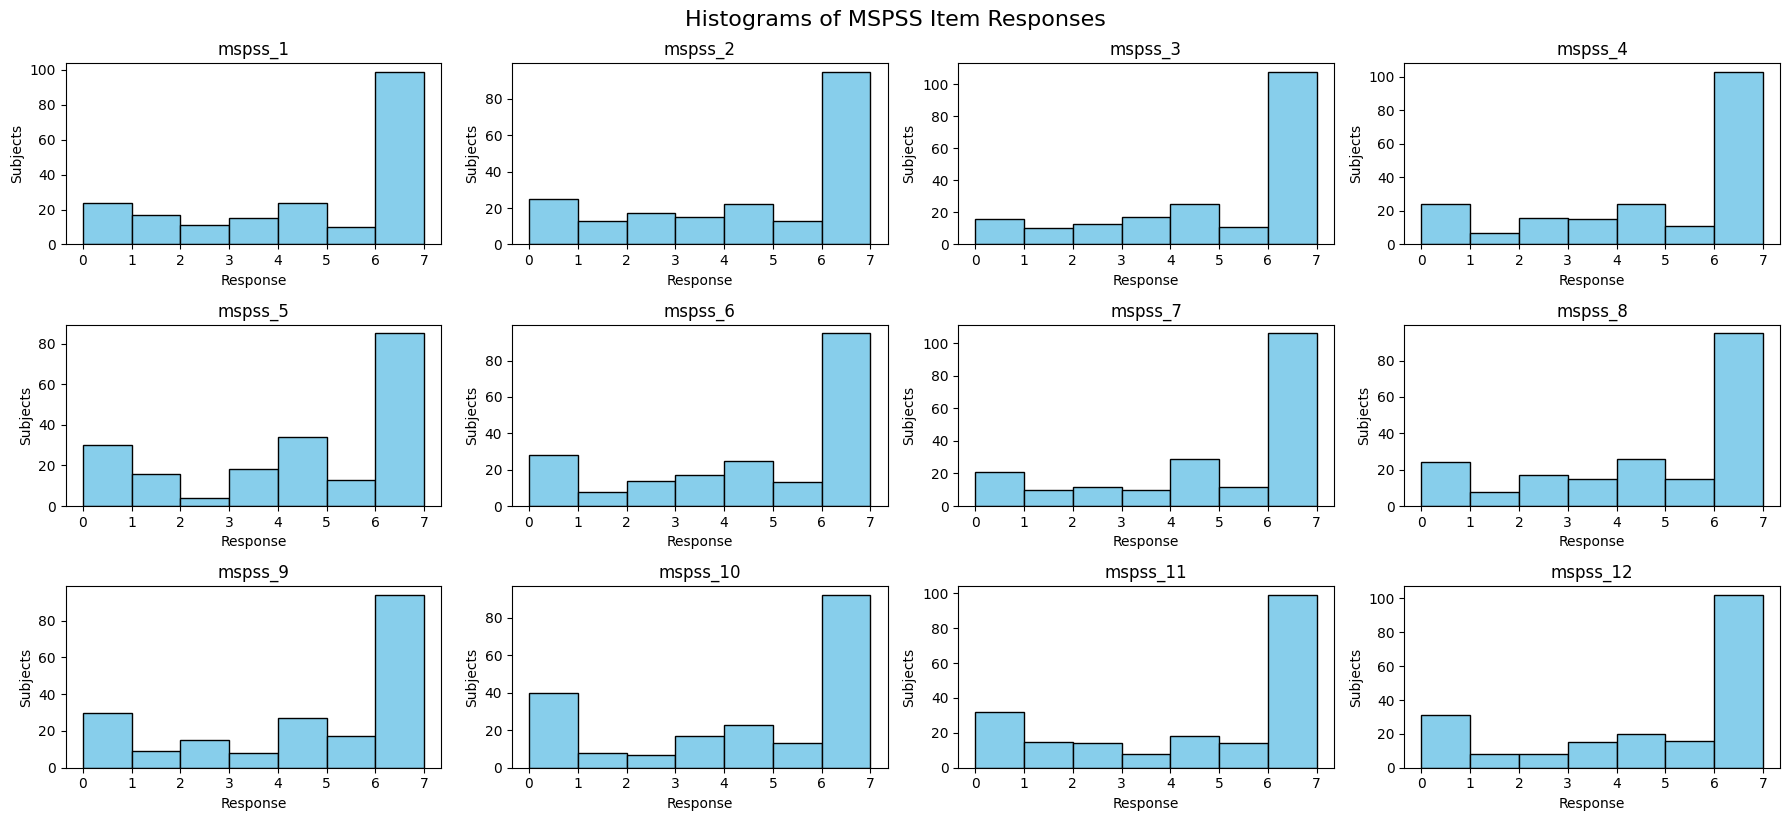

In [50]:
# Select only MSPSS item columns
mspss_item_cols = [f"mspss_{i}" for i in range(1, 13)]
df_mspss = df_simplified[mspss_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(mspss_item_cols)
n_rows, n_cols = 3, 4  # 12 items: 3 rows x 4 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

# Histograms for each MSPSS item
for idx, col in enumerate(mspss_item_cols):
    axes[idx].hist(df_mspss[col], bins=7, color='skyblue', edgecolor='black')  # responses 1–7
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of MSPSS Item Responses", fontsize=16, y=1.02)
plt.show()


In [51]:
# Descriptive statistics
print(df_mspss.describe())

          mspss_1     mspss_2     mspss_3     mspss_4     mspss_5     mspss_6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     4.440000    4.380000    4.815000    4.615000    4.192893    4.430000   
std      2.539418    2.525369    2.340548    2.479418    2.504940    2.525269   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    3.000000    3.000000    2.750000    2.750000   
50%      5.000000    5.000000    6.000000    6.000000    4.192893    5.000000   
75%      7.000000    7.000000    7.000000    7.000000    6.000000    7.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

          mspss_7     mspss_8     mspss_9    mspss_10    mspss_11    mspss_12  
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     4.700000    4.485000    4.420000    4.206030    4.315000    4.530000  
std      2.395557    2.447391 

In [52]:
# Cronbach's alpha for MSPSS
c_alpha_pcl5 = cronbach_alpha(df_mspss)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.8824


MSPSS item scores are generally in the mid–high range, with medians around 4–6 on the 0–7 scale, indicating moderate to high perceived social support in this sample. Variability is substantial (standard deviations about 2.4–2.7), showing that support levels differ meaningfully across participants. The Cronbach’s alpha of 0.88 indicates good internal consistency, so the MSPSS total (and subscale) scores can be considered reliable measures of perceived social support.

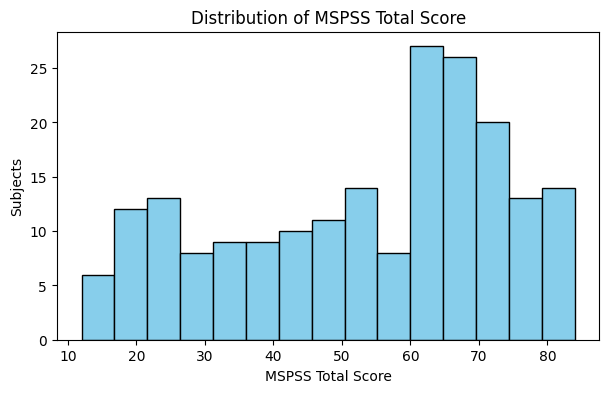

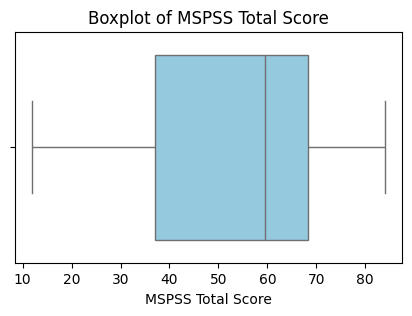

MSPSS total score summary statistics:
count    200.000000
mean      53.528924
std       19.946584
min       12.000000
25%       37.000000
50%       59.500000
75%       68.250000
max       84.000000
Name: mspss_total, dtype: float64
Shapiro-Wilk test statistic: 0.9396
P-value: 0.0000
The MSPSS total score distribution significantly deviates from normality.


In [53]:
# Compute the total MSPSS score
mspss_item_cols = [f"mspss_{i}" for i in range(1, 13)]
df_simplified['mspss_total'] = df_simplified[mspss_item_cols].sum(axis=1)

# Visualize histogram of MSPSS total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['mspss_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("MSPSS Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of MSPSS Total Score")
plt.show()

# Visualize boxplot of MSPSS total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['mspss_total'], color='skyblue')
plt.xlabel("MSPSS Total Score")
plt.title("Boxplot of MSPSS Total Score")
plt.show()

# Summary statistics
print("MSPSS total score summary statistics:")
print(df_simplified['mspss_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['mspss_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The MSPSS total score distribution is compatible with normality.")
else:
    print("The MSPSS total score distribution significantly deviates from normality.")

# Drop all MSPSS item columns from the DataFrame
df_simplified = df_simplified.drop(columns=mspss_item_cols)


MSPSS total scores range from 12 to 84, with a mean of about 53.5, indicating generally moderate to high perceived social support in this sample. The histogram and boxplot show a right‑skewed distribution, with many participants scoring in the higher support range and fewer at very low scores. The Shapiro–Wilk test (statistic = 0.94, p < 0.001) confirms that the MSPSS total score is not normally distributed, so non‑parametric tests or category-based analyses (low, moderate, high support) are more appropriate than parametric methods that assume normality.​

MSPSS does not have universal clinical cut-offs, but the original guidelines often use three bands based on the mean item score (total score ÷ 12):
- Mean 1–2.9: Low support
- Mean 3–5: Moderate support
- Mean 5.1–7: High support

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_82211/1096084786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


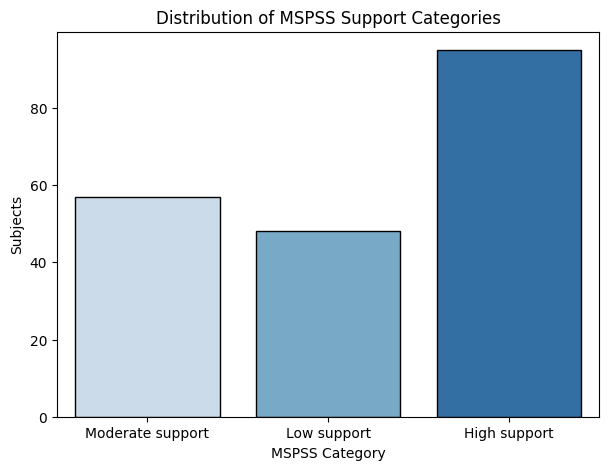

MSPSS Category
High support        95
Moderate support    57
Low support         48
Name: count, dtype: int64


In [54]:
# Compute mean item score
mspss_mean = df_simplified['mspss_total'] / 12.0

# MSPSS categories based on mean item score
mspss_categories = [
    "Low support" if m < 3 else
    "Moderate support" if m <= 5 else
    "High support"
    for m in mspss_mean
]

mspss_cat_series = pd.Series(mspss_categories, name='MSPSS Category')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=mspss_cat_series,
    palette=sns.color_palette("Blues", n_colors=3),
    edgecolor='black'
)
plt.xlabel('MSPSS Category')
plt.ylabel('Subjects')
plt.title('Distribution of MSPSS Support Categories')
plt.show()

print(mspss_cat_series.value_counts())


In [55]:
df_simplified

,age,gender,education,marital,income,swls_1,swls_2,swls_3,swls_4,swls_5,...,who5_5,gender_label,school_labels,marital_labels,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total
0,39.0,0,8.0,1.0,14000,2,0.0,4.0,2.0,0,...,2.0,Male,Middle,Married,39.000000,25.0,0.0,24.0,0.0,51.0
1,18.0,1,5.0,1.0,25000,0,4.0,2.0,4.0,4,...,2.0,Female,Elementary,Married,33.000000,16.0,0.0,8.0,6.0,43.0
2,40.0,0,13.0,2.0,56000,0,2.0,4.0,0.0,2,...,3.0,Male,High,Divorced,60.000000,0.0,7.0,0.0,50.0,18.0
3,24.0,1,22.0,0.0,35000,2,2.0,4.0,3.0,4,...,3.0,Female,Master,Single,56.000000,7.0,8.0,0.0,63.0,26.0
4,19.0,1,22.0,1.0,42000,5,7.0,3.0,5.0,7,...,3.0,Female,Master,Married,0.000000,14.0,4.0,1.0,8.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,4,1.0,4.0,0.0,0,...,1.0,Male,High,Married,66.000000,5.0,10.0,0.0,77.0,15.0
196,21.0,0,18.0,1.0,38000,4,4.0,4.0,4.0,3,...,3.0,Male,Bachelor,Married,68.000000,5.0,8.0,0.0,69.0,35.0
197,20.0,1,22.0,4.0,50000,7,7.0,7.0,1.0,7,...,3.0,Female,Master,Separated,11.000000,13.0,4.0,3.0,0.0,63.0
198,39.0,0,8.0,1.0,22000,0,4.0,4.0,4.0,1,...,0.0,Male,Middle,Married,46.000000,15.0,0.0,23.0,8.0,48.0


#### SWLS

#### WHO5

# Bivariate EDA
- Correlations between continuous scales (Spearman if non‑normal) and between each scale and age/income.
- Boxplots or violin plots of key scores by gender, income groups, or other relevant categories.

# Multivariate EDA
A correlation heatmap for all composite scores to show how dimensions (addictions, PTSD, well‑being, social support) relate.​

## boh

Since normality assumptions are violated, parametric tests that require normally distributed data (e.g., t-tests, ANOVA, Pearson correlations) may not be appropriate without data transformation. Instead, nonparametric statistical methods should be considered as they do not assume normality and are robust to skewed or ordinal data. Examples include the Mann-Whitney U test, Kruskal-Wallis test, and Spearman rank correlations.

Verifying the absence of normality supports the use of non-parametric correlation tests (e.g., Spearman’s rho) when exploring relationships between sociodemographic characteristics and behavioral traits relevant to the development of player personas for the game.

In [ ]:
df_filtered = new_df

In [ ]:
results = []
for i in range(1, 21):
    col = f'iat_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results)
result_df.head(10)

Since the Shapiro–Wilk tests indicated that the IAT item distributions are not normally distributed (p < 0.05 for all items), a non-parametric correlation measure was considered more appropriate. For this reason, the Spearman correlation test was applied to assess the degree of association among the IAT items.

**Spearman correlation test**

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [ ]:
# Select only IAT columns
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_')]
df_iat = df_filtered[iat_cols]

# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_iat = df_iat.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_iat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of IAT Columns")
plt.show()

In [ ]:
# Extract upper triangle (excluding diagonal)
corr_values_iat = corr_matrix_iat.where(~np.eye(corr_matrix_iat.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_iat = corr_values_iat.min()
max_corr_iat = corr_values_iat.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_iat:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_iat:.2f}")

The strong positive correlations observed among IAT items confirm their internal consistency, it is both theoretically and psychometrically sound to compute a composite score by summing IAT item values for each participant, as emphasized in the paper’s methodological rationale (see Jelenchick et al., 2012).​

**Cronbach’s Alpha**

Alpha was developed by Lee Cronbach in 195111 to provide a measure of the internal consistency of a test or scale; it is expressed as a number between 0 and 1. Internal consistency describes the extent to which all the items in a test measure the same concept or construct and hence it is connected to the inter-relatedness of the items within the test. 
If the Alpha is high (above 0.7 or 0.8), it means all the questions are basically measuring the same thing, so you can trust the sum or average as a reliable score for that concept.
https://pmc.ncbi.nlm.nih.gov/articles/PMC4205511/

https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

In [ ]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every relevant correlation to an array called 'r_s'. 
    # Then, we'll calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha


## IAT

In [ ]:
cronbach_alpha(df_iat)

In [ ]:
#specify the columns to sum
cols_to_sum = [col for col in df_filtered.columns if col.lower().startswith(('iat'))]

#define new column that contains sum of specific columns
df_filtered['iat_total'] = df_filtered[cols_to_sum].sum(axis=1).round(1)
df_filtered.head()

In [ ]:
cols_to_keep = [col for col in df_filtered.columns if not col.lower().startswith('iat') or col == 'iat_total']
df_filtered = df_filtered[cols_to_keep]
df_filtered.head()

Following the computation of the composite IAT score by summing the 20 item scores into 'sum_iat' and removal of the individual item columns, participants are categorized into internet addiction levels based on established author guidelines from Young (1998).
Specifically, scores below **40 indicate average (normal) users**, scores of **40 to 69 indicate problematic internet use**, and scores of **70 or above indicate severe internet addiction**. This categorization provides a clinically meaningful stratification of participants’ internet use severity, facilitating interpretation, group comparisons, and targeted interventions based on risk levels.

In [ ]:
# 1. Create an addiction level Series on the fly
def classify_iat(total):
    if total <= 39:
        return 'Normal'
    elif total <= 69:
        return 'Problematic'
    else:
        return 'Severely problematic'

order = ['Normal', 'Problematic', 'Severely problematic']

addiction_levels = df_filtered['iat_total'].apply(classify_iat)
counts = pd.Series(addiction_levels).value_counts().reindex(order).reset_index()
counts.columns = ['addiction_level', 'count']

# 2. Choose a color palette (blue gradient)
blue_palette = sns.color_palette("Blues", n_colors=3)

# 3. Draw the bar plot (without adding column to DataFrame)
plt.figure(figsize=(7,5))
sns.barplot(
    data=counts,
    x='addiction_level',
    y='count',
    palette=blue_palette,
    order=order
)
plt.xlabel('Internet Addiction Level')
plt.ylabel('Count')
plt.title('Distribution of Internet Addiction Levels')
plt.tight_layout()
plt.show()

According to IAT Author guidelines there are 75 average users, 58 problematic internet users and 67 severely problematic users in the df_filtered.

## Other psychometric instruments

In [ ]:
audit_cols = [col for col in df_filtered.columns if col.startswith('audit_')]
df_audit = df_filtered[audit_cols]

dast_cols = [col for col in df_filtered.columns if col.startswith('dast_')]
df_dast = df_filtered[dast_cols]

pgsi_cols = [col for col in df_filtered.columns if col.startswith('pgsi_')]
df_pgsi = df_filtered[pgsi_cols]

pcl5_cols = [col for col in df_filtered.columns if col.startswith('pcl5_')]
df_pcl5 = df_filtered[pcl5_cols]

mspss_cols = [col for col in df_filtered.columns if col.startswith('mspss_')]
df_mspss = df_filtered[mspss_cols]

swls_cols = [col for col in df_filtered.columns if col.startswith('swls_')]
df_swls = df_filtered[swls_cols]

who5_cols = [col for col in df_filtered.columns if col.startswith('who5_')]
df_who5 = df_filtered[who5_cols]

In addition to the IAT, the internal consistency of the other psychometric instruments included in the dataset — namely the WHO-5, MSPSS, SWLS, PCL-5, and PGSI — was assessed using Cronbach’s Alpha. 
Each of these scales is composed of multiple items rated on a numerical or Likert-type scale (Likert-type scales are ordinal rating scales commonly used in questionnaires that ask respondents to indicate their level of agreement or frequency on a symmetric scale, allowing quantification of subjective attitudes.). 

In [ ]:
cronbach_alpha(df_audit), cronbach_alpha(df_dast), cronbach_alpha(df_pgsi), cronbach_alpha(df_pcl5), cronbach_alpha(df_mspss), cronbach_alpha(df_swls), cronbach_alpha(df_who5)

The scales showed good to excellent internal consistency overall, meaning their items reliably measure the same construct. Lower reliability for the WHO-5 suggests it covers more diverse aspects of well-being, consistent with its intended broad coverage. 
The practice of summing scale items to create a composite score is already validated in the literature for these psychometric instruments. Accordingly, after revalidating the reliability of our scales using Cronbach’s alpha, we proceeded to aggregate item scores in line with prior research.

Before summing the item scores for each scale, we verified the normality of item distributions using the Shapiro–Wilk test, which is widely recommended for its statistical power in detecting deviations from normality. This verification is crucial, as the assumption of normality directly affects the validity of many statistical analyses and guides the choice between parametric and non-parametric tests.

### PGSI

In [ ]:
results_pgsi = []
for i in range(1, 10):
    col = f'pgsi_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_pgsi.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_pgsi)
result_df

### MSPSS

The MSPSS demonstrated good overall internal consistency (Cronbach’s α = 0.884), indicating that the items reliably measure perceived social support. To explore the multidimensional structure of the scale, we examined the internal correlations within each subscale: Significant Other, Family, and Friends and then summed them as subgroups.

In [ ]:
results_mspss = []
for i in range(1, 13):
    col = f'mspss_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_mspss.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_mspss)
result_df

In [ ]:
# Define the subgroups
so_items = [f"mspss_{i}" for i in [1, 2, 5, 10] if f"mspss_{i}" in df_filtered.columns]  # Significant Other
fa_items = [f"mspss_{i}" for i in [3, 4, 8, 11] if f"mspss_{i}" in df_filtered.columns]  # Family
fr_items = [f"mspss_{i}" for i in [6, 7, 9, 12] if f"mspss_{i}" in df_filtered.columns]  # Friends

# Function to plot heatmap
def plot_heatmap(name, cols):
    if not cols:
        print(f"⚠️ No columns found for {name}.")
        return
    corr = df[cols].corr(method='spearman')
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
    plt.title(f"Spearman Correlation - {name}")
    plt.tight_layout()
    plt.show()
    
    # Extract upper triangle (excluding diagonal)
    corr_values = corr.where(~np.eye(corr.shape[0], dtype=bool)).stack()
    
    # Compute min and max
    min_corr = corr_values.min()
    max_corr = corr_values.max()
    
    print(f"{name} - Minimum Spearman correlation (excluding diagonal): {min_corr:.2f}")
    print(f"{name} - Maximum Spearman correlation (excluding diagonal): {max_corr:.2f}")

# Plot heatmaps for each subgroup 
plot_heatmap("Significant Other", so_items)
plot_heatmap("Family", fa_items)
plot_heatmap("Friends", fr_items)

Overall, the pattern of correlations supports the multidimensional structure of the MSPSS: the subscales capture related but distinct facets of perceived social support, with sufficient internal coherence to justify their use as separate subscale scores.

### SWLS

In [ ]:
results_swls = []
for i in range(1, 6):
    col = f'swls_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_swls.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_swls)
result_df

### WHO_5

In [ ]:
results_who5 = []
for i in range(1, 6):
    col = f'who5_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_who5.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_who5)
result_df

In [ ]:
df_filtered

In [ ]:
# 1. Utility: Columns by Prefix Matcher (robust for underscores)
def cols(prefix, df):
    """Return columns that match the given prefix, case-insensitive, with or without trailing underscores."""
    return [c for c in df.columns if c.lower().startswith(prefix.lower())]

# 3. Define item groupings explicitly
WHO5_items   = cols("who5_", df_filtered)
SWLS_items   = cols("swls_", df_filtered)
AUDIT_items  = cols("audit_", df_filtered)
PGSI_items   = cols("pgsi_", df_filtered)
DAST_items   = cols("dast_", df_filtered)
PCL5_items   = cols("pcl5_", df_filtered)

# For MSPSS, match both with and without trailing underscores
def exact_item(name, df):
    # For items like mspss_1 or mspss_1_ etc.
    candidates = [
        c for c in df.columns
        if c.lower().replace('_', '') == name.lower().replace('_', '')
    ]
    return candidates

MSPSS_items = {}
for n in range(1, 13):
    MSPSS_items[f"mspss_{n}"] = exact_item(f"mspss_{n}", df_filtered)

so_colnames = [col for i in [1,2,5,10] for col in MSPSS_items[f"mspss_{i}"]]
fa_colnames = [col for i in [3,4,8,11] for col in MSPSS_items[f"mspss_{i}"]]
fr_colnames = [col for i in [6,7,9,12] for col in MSPSS_items[f"mspss_{i}"]]

# 4. Calculate total scores for each test/scale
df_filtered["who5_total"] = df_filtered[WHO5_items].sum(axis=1) if WHO5_items else None
df_filtered["swls_total"] = df_filtered[SWLS_items].sum(axis=1) if SWLS_items else None
df_filtered["audit_total"] = df_filtered[AUDIT_items].sum(axis=1) if AUDIT_items else None
df_filtered["pgsi_total"] = df_filtered[PGSI_items].sum(axis=1) if PGSI_items else None
df_filtered["dast10_total"] = df_filtered[DAST_items].sum(axis=1) if DAST_items else None
df_filtered["pcl5_total"] = df_filtered[PCL5_items].sum(axis=1) if PCL5_items else None

# MSPSS - 3 subscales
df_filtered["mspss_so"] = df_filtered[so_colnames].sum(axis=1) if so_colnames else None
df_filtered["mspss_fa"] = df_filtered[fa_colnames].sum(axis=1) if fa_colnames else None
df_filtered["mspss_fr"] = df_filtered[fr_colnames].sum(axis=1) if fr_colnames else None

df_filtered["mspss_so_mean"] = df_filtered[so_colnames].sum(axis=1) / 4 if so_colnames else None
df_filtered["mspss_fa_mean"] = df_filtered[fa_colnames].sum(axis=1) / 4 if fa_colnames else None
df_filtered["mspss_fr_mean"] = df_filtered[fr_colnames].sum(axis=1) / 4 if fr_colnames else None
df_filtered["mspss_total_mean"] = (
    df_filtered[so_colnames].sum(axis=1) +
    df_filtered[fa_colnames].sum(axis=1) +
    df_filtered[fr_colnames].sum(axis=1)
) / 12


# 5. Remove all item-level columns (keep only scores, and ID/demographics)
item_cols = (
    WHO5_items + SWLS_items + AUDIT_items + PGSI_items +
    DAST_items + PCL5_items +
    [col for item in MSPSS_items.values() for col in item]
)

df_filtered = df_filtered.drop(columns=item_cols, errors='ignore')

# 6. Save ready-for-analysis dataframe
print("Final score columns in df_filtered:")
print([col for col in df_filtered.columns if "total" in col or col.startswith("mspss_")])

df_filtered.to_csv("df_cleaned_scores_only.csv", index=False)
print("SAVED → df_cleaned_scores_only.csv")

In [ ]:
df_filtered

In [ ]:
cols_to_drop = [
    'mspss_so', 'mspss_fa', 'mspss_fr',
    'mspss_so_mean', 'mspss_fa_mean', 'mspss_fr_mean',
]
df_filtered = df_filtered.drop(columns=cols_to_drop, errors='ignore')
df_filtered

In [ ]:
# Bin edges and labels
#iat_bins = [0, 40, 70, 101]
#iat_labels = ['<40 Normal', '40–69 Problematic', '≥70 Severely problematic']

pcl5_bins = [0, 34]
pcl5_labels = ['<34 Normal', '≥34 PTSD']

who5_bins = [0, 13, 26]
who5_labels = ['<13 Poor wellbeing', '13–25 Good wellbeing']

swls_bins = [0, 20, 25, 36]
swls_labels = ['<20 Dissatisfaction', '20–24 Neutral', '≥25 High Satisfaction']

pgsi_bins = [0, 1, 3, 8, 28]
pgsi_labels = ['0 Non-problem', '1–2 Low-risk', '3–7 Moderate-risk', '8+ Problem gambling']

dast_bins = [0, 1, 3, 6, 11]
dast_labels = ['0 No problems', '1–2 At risk', '3–5 Moderate', '6+ Severe']

audit_bins = [0, 8, 16, 20, 41]
audit_labels = ['0–7 Low Risk', '8–15 Hazardous', '16–19 Harmful', '20+ Dependence']

mspss_bins = [0, 3, 5, 7]
mspss_labels = ['<3 Low support', '3–5 Moderate support', '>5 High support']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Helper to plot if column exists
def safe_hist(df, col, bins, labels, ax, color, title):
    if col in df.columns:
        vals = df[col].dropna()
        counts, _ = np.histogram(vals, bins=bins)
        ax.bar(labels, counts, color=color, edgecolor='black')
        ax.set_title(title)
        ax.set_ylabel('Number of People')
        ax.set_xlabel('Score Range')
    else:
        ax.text(0.5, 0.5, f'Missing: {col}', ha='center', va='center', fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(title)

# Plot all six panels safely; adapt colors and titles as needed
safe_hist(df_filtered, 'pcl5_total', pcl5_bins, pcl5_labels, axes[0, 0], 'royalblue', 'PTSD checklist (PCL5)')
safe_hist(df_filtered, 'who5_total', who5_bins, who5_labels, axes[0, 1], 'green', 'WHO-5 Well-being')
safe_hist(df_filtered, 'swls_total', swls_bins, swls_labels, axes[0, 2], 'orange', 'Satisfaction With Life Scale (SWLS)')
safe_hist(df_filtered, 'pgsi_total', pgsi_bins, pgsi_labels, axes[1, 0], 'purple', 'Problem Gambling Severity Index (PGSI)')
safe_hist(df_filtered, 'dast10_total', dast_bins, dast_labels, axes[1, 1], 'gray', 'Drug Abuse Screening Test (DAST-10)')
safe_hist(df_filtered, 'audit_total', audit_bins, audit_labels, axes[1, 2], 'brown', 'Alcohol Use Disorders Identification Test (AUDIT)')
safe_hist(df_filtered, 'mspss_total_mean', mspss_bins, mspss_labels, axes[2, 0], 'skyblue', 'Distribution of MSPSS Mean Scores by Level of Perceived Social Support')

plt.tight_layout()
plt.show()


## Correlation between IAT and other pshycometric instruments

**Spearman correlation** was applied to examine associations between continuous or ordinal variables that are not normally distributed, such as IAT total scores and numerical demographic variables (e.g., age, income). This nonparametric correlation measures the strength and direction of monotonic relationships without assuming normality.

In contrast, the **Kruskal-Wallis test** was used to compare IAT scores across categorical groups (e.g., gender categories). It is a nonparametric alternative to one-way ANOVA for assessing whether the medians differ between three or more independent groups when data are not normally distributed.

The Kruskal-Wallis test is essentially **an extension of the Mann-Whitney U test**, which is used for comparing exactly two independent groups on a continuous or ordinal variable under non-normality assumptions. Therefore, the Mann-Whitney U test is applied when comparing two groups, while Kruskal-Wallis is appropriate for three or more groups.

Thus, the choice of test depends on whether the aim is to assess association between variables (Spearman), or differences between two groups (Mann-Whitney U), or differences among three or more groups (Kruskal-Wallis) under non-normal data conditions.

https://www.slideshare.net/slideshow/kruskal-wallis-test-friedman-test-spearman-correlation/197229012

### AGE

The IAT total score was analyzed across different age groups to explore potential demographic effects.
Since both variables were non-normally distributed, as previously demonstrated, a non-parametric Kruskal–Wallis test was used.
Visual inspection through boxplots and the statistical test allow to assess whether the level of Internet addiction significantly differs among age categories.

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df_filtered['iat_total'],
    y=df_filtered['age'],
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relationship between Age and Internet Addiction (IAT)', fontsize=14)
plt.xlabel('IAT Total Score (sum_iat)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Spearman correlation test
spearman_corr, spearman_p_value = spearmanr(df_filtered['iat_total'], df_filtered['age'])

print(f"Spearman's correlation coefficient: {spearman_corr:.3f}")
print(f"p-value: {spearman_p_value:.3f}")

No significant correlation was found between participants’ age and their Internet Addiction Test (IAT) scores (ρ = -0.02, p = 0.783).
This indicates that, within this sample, the level of Internet addiction does not appear to vary with age.

### GENDER

In [ ]:
# Nonparametric analysis of sum_iat by gender (4 categories)
# Use Kruskal–Wallis for ≥3 groups (here 4) + post-hoc Mann–Whitney with Holm correction
# If only 2 groups, use Mann–Whitney U directly
# Effect sizes: ε² (omnibus), rank-biserial r (pairwise), HL (robust difference)

# Preparing data
gender_labels = {0: "Male", 1: "Female", 2: "Non-binary", 3: "Prefer not to say"}

df_gender = df_filtered[["gender", "iat_total"]].copy()
df_gender["gender_label"] = df_gender["gender"].map(gender_labels)

order_all = ["Male", "Female", "Non-binary", "Prefer not to say"]
present_groups = [g for g in order_all if g in df_gender["gender_label"].unique().tolist()]
if len(present_groups) < 2:
    raise RuntimeError("At least 2 gender categories with data are needed.")


desc = (
    df_gender.groupby("gender_label")["iat_total"]
    .agg(n="count", median="median", mean="mean", std="std")
    .reindex(order_all)
)
print("=== Descriptive stats sum_iat by Gender ===")
print(desc.round(2).fillna(""))

# Test: 2 groups → Mann–Whitney U, ≥3 groups → Kruskal–Wallis + post hoc
if len(present_groups) == 2:
    g1, g2 = present_groups
    a = df_gender.loc[df_gender["gender_label"] == g1, "iat_total"].values
    b = df_gender.loc[df_gender["gender_label"] == g2, "iat_total"].values

    U, p = mannwhitneyu(a, b, alternative="two-sided", method="auto")
    r_rb = 1 - (2 * U) / (len(a) * len(b))  # rank-biserial correlation

    print(f"\n--- Mann–Whitney U test ({g1} vs {g2}) ---")
    print(f"U = {U:.2f}, p = {p:.4f}, rank-biserial r = {r_rb:.3f}")

else:
    groups = [df_gender.loc[df_gender["gender_label"] == g, "iat_total"].values for g in present_groups]
    H, p_kw = kruskal(*groups)
    n_tot = sum(len(g) for g in groups)
    k = len(groups)
    eps2 = (H - k + 1) / (n_tot - k) if (n_tot - k) > 0 else np.nan  # epsilon-squared effect size

    print(f"\n--- Kruskal–Wallis test (k={k} groups) ---")
    print(f"H = {H:.3f}, df = {k - 1}, p = {p_kw:.4f}")
    print(f"Effect size: epsilon-squared ε² = {eps2:.3f}")

    # Post-hoc pairwise Mann–Whitney with Holm correction
    def rank_biserial_from_U(U, n1, n2):
        return 1 - (2 * U) / (n1 * n2)

    def hodges_lehmann(a, b):
        return float(np.median(np.subtract.outer(b, a).ravel()))

    def holm_bonferroni(pvals):
        m = len(pvals)
        order = np.argsort(pvals)
        p_sorted = np.array(pvals)[order]
        adj = np.empty(m, dtype=float)
        running_max = 0.0
        for i, p in enumerate(p_sorted):
            val = (m - i) * p
            running_max = max(running_max, val)
            adj[i] = min(1.0, running_max)
        p_adj = np.empty(m, dtype=float)
        p_adj[order] = adj
        return p_adj

    pairs = []
    for gA, gB in itertools.combinations(present_groups, 2):
        A = df_gender.loc[df_gender["gender_label"] == gA, "iat_total"].values
        B = df_gender.loc[df_gender["gender_label"] == gB, "iat_total"].values
        U, p_raw = mannwhitneyu(A, B, alternative="two-sided", method="auto")
        r_rb = rank_biserial_from_U(U, len(A), len(B))
        hl = hodges_lehmann(A, B)
        pairs.append({
            "Group_A": gA, "Group_B": gB,
            "n_A": len(A), "n_B": len(B),
            "U": float(U), "p_raw": float(p_raw),
            "r_rank_biserial": float(r_rb),
            "HL_diff(B-A)": float(hl)
        })

    pairs_df = pd.DataFrame(pairs)
    pairs_df["p_holm"] = holm_bonferroni(pairs_df["p_raw"].values)
    pairs_df = pairs_df.sort_values("p_holm").reset_index(drop=True)

    print("\n=== Post-hoc pairwise Mann–Whitney (Holm–Bonferroni corrected p-values) ===")
    print(pairs_df.round(4).to_string(index=False))

    sig_pairs = pairs_df[pairs_df["p_holm"] < 0.05]
    if not sig_pairs.empty:
        print("\nSignificant group pairs (p < 0.05 after Holm correction):")
        for _, r in sig_pairs.iterrows():
            direction = "B > A" if r["r_rank_biserial"] > 0 else "A > B"
            print(
                f" - {r['Group_A']} vs {r['Group_B']}: {direction}, HL = {r['HL_diff(B-A)']:.2f}, p = {r['p_holm']:.4f}")
    else:
        print("\nNo significant differences between groups (after Holm correction).")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_gender, x="gender_label", y="iat_total",
    order=order_all, showfliers=False, palette="Blues"
)
sns.swarmplot(
    data=df_gender, x="gender_label", y="iat_total",
    order=order_all, alpha=0.6, color="black"
)
plt.title("IAT total score (iat_total) per Gender category")
plt.xlabel("Gender")
plt.ylabel("IAT total score")
plt.tight_layout()
plt.show()

The descriptive statistics show varying mean scores of sum_iat by gender group, with Females (mean 58.83) and "Prefer not to say" (mean 56.50) scoring higher on average than Males (mean 48.77) and Non-binary individuals (mean 39.45).

The Kruskal-Wallis test yielded a statistic H=9.724 with 3 degrees of freedom and a p-value of 0.0211, indicating a statistically significant difference in internet addiction scores across the gender groups.

The effect size, epsilon-squared (ε²=0.034), suggests a small effect.

Post-hoc pairwise Mann-Whitney tests with Holm-Bonferroni correction revealed a significant difference only between the Female and Non-binary groups (p=0.0296), with Females showing notably higher scores (Hodges-Lehmann difference of -21.00).

Other group comparisons were not statistically significant after correction.

In summary, the test indicates real differences in internet addiction levels between gender categories, especially highlighting **higher addiction scores in Females compared to Non-binary individuals**. Other gender group differences were not found to be significant.



### EDUCATION

In [ ]:
# Computing descriptive statistics for each education level 
for e in df_filtered['education'].unique():
    print(f"\nGroup {e}:")
    print(df_filtered[df_filtered['education'] == e]['iat_total'].describe())

# Mapping and preparing data (education levels)
education_labels = {
    5: 'Elementary',
    8: 'Middle School',
    13: 'High School',
    18: "Bachelor's Degree",
    22: "Master's Degree",
    25: 'Doctoral Degree'
}

# filter only necessary columns
df_edu = df_filtered[['education', 'iat_total']].copy()

# Apply the label mapping
df_edu['education_label'] = df_edu['education'].map(education_labels)

# Consistent order for the plot
edu_order = ['Elementary', 'Middle School', 'High School',
             "Bachelor's Degree", "Master's Degree", "Doctoral Degree"]


In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_edu, x='education_label', y='iat_total', order=edu_order, showfliers=False, palette='Blues')
sns.swarmplot(data=df_edu, x='education_label', y='iat_total', order=edu_order, color='black', alpha=0.6, size=3)
plt.title('Internet Addiction (sum_iat) by Education Level', fontsize=13)
plt.xlabel('Education Level')
plt.ylabel('IAT Total Score (iat_total)')
#plt.xticks(rotation=15)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

These descriptive statistics illustrate the distribution of internet addiction scores (sum_iat) across different education levels.

- Groups with education levels 8.0 ("Middle School") and 13.0 ("High School") show high mean scores (around 70.6 and 58.7 respectively) with considerable variability (std ~23–28), suggesting more intense or varied internet use in these education groups.
- Group 5.0 ("Elementary") and 18.0 ("Bachelor's Degree") present intermediate mean values (~49.6 and 53.3) with moderate variability, indicating moderate levels of internet addiction with some spread.
- Groups 22.0 ("Master's Degree") and 25.0 ("Doctoral Degree") have notably lower means (around 21.9 and 20.7) and lower variability, possibly indicating a more controlled or less problematic internet usage pattern among higher education levels.

The wide ranges and high maximum values in some groups (e.g., max 100 for groups 8.0 and 13.0) also suggest subgroups with very high addiction scores despite overall averages.

Overall, these statistics highlight a trend where **lower to mid education groups show higher and more variable internet addiction scores**, whereas **advanced education groups exhibit lower addiction scores and less variability**. This pattern may reflect differences in awareness, self-regulation, or lifestyle across education levels.

This insight justifies further inferential analysis (e.g., Kruskal-Wallis test) to formally assess differences between education groups and possibly tailor interventions or awareness campaigns based on education background.

In [ ]:
# Kruskal–Wallis test
groups_edu = [df_edu.loc[df_edu['education_label'] == g, 'sum_iat'].dropna()
              for g in edu_order if g in df_edu['education_label'].unique()]

if len(groups_edu) > 1:
    H, p = kruskal(*groups_edu)
    print(f"Kruskal–Wallis Test for Education Level:")
    print(f"Statistic (H) = {H:.3f}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\n→ Result: significant differences in IAT scores among education levels.")
    else:
        print("\n→ Result: no significant differences in IAT scores among education levels.")
else:
    print("Not enough groups to perform the Kruskal–Wallis test.")

The Kruskal–Wallis test for education level reports a test statistic H=60.987 with a p-value of 0.0000, indicating strong evidence that differences exist in Internet Addiction Test (IAT) scores among the different education groups.
In particular:
- Groups with middle to high school education (8.0 and 13.0) show relatively high mean scores (~70.6 and 58.7) with substantial variability, indicating higher and more diverse internet addiction levels in these groups.
- Groups with elementary education (5.0) and bachelor's degree (18.0) show moderate mean scores (~49.6 and 53.3).
- Groups with master’s and doctoral degrees (22.0 and 25.0) have much lower mean scores (~21.9 and 20.7) and lower variability, which may imply more controlled internet use or lower addiction levels with higher education.

Overall, these results support the conclusion that **education level influences internet addiction scores, with higher education generally associated with lower addiction scores**.

### MARITAL STATUS

Calculate descriptive statistics for each marital status group before the Kruskal-Wallis test to observe differences in the distribution of IAT scores among the groups.

In [ ]:
# Computing descriptive statistics for each marital status 
for g in df_filtered['marital'].unique():
    print(f"Gruppo {g}:")
    print(df_filtered[df_filtered['marital'] == g]['sum_iat'].describe())

In [ ]:
# Mapping and preparing data (education levels)
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}

# filter only necessary columns
df_mar = df_filtered[['marital', 'sum_iat']].copy()

# Apply the label mapping
df_mar['marital_label'] = df_mar['marital'].map(marital_labels)

# Consistent order for the plot
marital_order = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say']



In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, showfliers=False, palette='Blues')
sns.swarmplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, color='black', alpha=0.6, size=3)
plt.title('Internet Addiction (sum_iat) by Marital Status', fontsize=13)
plt.xlabel('Marital Status')
plt.ylabel('IAT Total Score (sum_iat)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

This boxplot and the accompanying descriptive statistics show distinct patterns in Internet Addiction Test (sum_iat) scores across marital status groups:

- Single individuals exhibit the highest mean and median scores, with a broad spread and many high outliers, suggesting they are particularly vulnerable to elevated internet addiction levels.
- Married, Divorced, and Widowed groups present lower average scores and narrower distributions, indicating reduced risk and less variability in addiction scores among these categories.
- Separated participants display the lowest IAT scores overall, with a compressed range and consistently low values.
- The “Prefer not to say” group is characterized by high mean scores and substantial variability, pointing to an ambivalent pattern with both very high and low cases.

Visually, the boxplot highlights both differences in central tendency and spread, showing that “Single” and “Prefer not to say” clusters lean towards higher and more variable internet addiction scores, while “Separated” and “Widowed” remain at the lower end. The presence of several outliers in “Single” and “Married” further reinforces the existence of subgroups with extreme behaviors.

These findings suggest that marital status is associated with markedly different levels of internet addiction, with the highest vulnerability observed among single individuals and the most stable, low scores among separated participants. However, statistical significance for these observed differences must be confirmed through a Kruskal–Wallis test. A p-value less than 0.05 would formally establish that marital status has a significant effect on internet addiction scores.

In [ ]:
# Kruskal–Wallis test
groups_mar = [df_mar.loc[df_mar['marital_label'] == g, 'sum_iat'].dropna()
              for g in marital_order if g in df_mar['marital_label'].unique()]

if len(groups_mar) > 1:
    H, p = kruskal(*groups_mar)
    print(f"Kruskal–Wallis Test per Marital Status:")
    print(f"Statistic (H) = {H:.3f}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\n→ Result: Significant differences in IAT scores between marital status groups.")
    else:
        print("\n→ Result: No significant differences in IAT scores between marital status groups.")
else:
    print("Not enough groups to perform the Kruskal–Wallis test.")

The Kruskal–Wallis test for marital status groups reports a test statistic H=54.705 with a p-value of 0.0000, indicating strong evidence that differences exist in Internet Addiction Test (IAT) scores among the different marital status groups.

In particular:
- Group 0.0 (likely “Single”) shows the highest mean IAT score (~75.76) and a wide spread, which indicates a generally higher level and variability of internet addiction in this group.
- Groups 1.0, 2.0, and 5.0 show intermediate mean scores (~46.1 to 51.1) with considerable variability, indicating moderate levels of internet addiction with variation among individuals.
- Groups 3.0 (possibly “Widowed”) and 4.0 (possibly “Separated”) have the lowest mean scores (~37.4 and 19.3) and less variability, suggesting lower and more consistent internet addiction levels.

Overall, these data align with findings in the literature that marital status impacts internet addiction risk, with **single individuals tending towards higher addiction scores compared to married, widowed, or separated groups**. The variability among groups justifies the use of Kruskal–Wallis to statistically test such differences.

### INCOME

This analysis employs a scatterplot to visualize the relationship between income and Internet Addiction Test (IAT) scores, allowing for an intuitive perceptual assessment of any patterns or trends present. Given that both variables are continuous and the distributions for income and IAT scores have been verified as non-normal, Spearman's rank correlation is the appropriate statistical method to use. This nonparametric correlation assesses the monotonic association between variables without relying on assumptions of linearity or normality, accommodating potential nonlinear or irregular data distributions. By combining graphical visualization with a robust statistical correlation measure, this approach enhances the validity and interpretability of the analysis results.

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df_filtered['sum_iat'],
    y=df_filtered['income'],
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relationship between Income and Internet Addiction (IAT)', fontsize=14)
plt.xlabel('IAT Total Score (sum_iat)', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Spearman correlation test
spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered['income'])

print(f"Spearman's correlation coefficient: {spearman_corr:.3f}")
print(f"p-value: {spearman_p_value:.3f}")

Scatter plot and analysis show a statistically significant negative correlation between Internet Addiction Test (IAT) total scores (sum_iat) and income. The Spearman’s rank correlation coefficient is -0.579, with a p-value of 0.000, indicating a moderate to strong negative association: **as internet addiction scores increase, reported income tends to decrease**.

In [ ]:
# As socio-economic factors might influence problematic Internet use — people with lower income could be more vulnerable 
# due to limited access to alternative offline activities or greater reliance on digital spaces.
# Given this finding, our subsequent analyses will likely focus on participants belonging to lower income brackets.

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_filtered,
    x='income',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Income in the Sample')
plt.xlabel('Income')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()

Divide participants into three income groups using quantiles. Then, calculate and compare the average Internet Addiction Test scores for each group. Visualize the differences with a boxplot to explore how income relates to internet addiction.


In [ ]:
# Create three income groups (quantiles)
df_filtered['income_group'] = pd.qcut(df_filtered['income'], q=3, labels=['Low', 'Medium', 'High'])

# IAT mean per each group
mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()
print(mean_iat_by_income)

# Boxplot
sns.boxplot(x='income_group', y='sum_iat', data=df_filtered, order=['Low', 'Medium', 'High'])
plt.title('Internet Addiction (sum_iat) by Income Group')
plt.xlabel('Income Group')
plt.ylabel('IAT Total Score')
plt.show()

The plot demonstrates that participants in the Low and Medium income groups generally have higher IAT scores, while those in the High income group have much lower scores. This visualization supports the observed negative correlation between income and internet addiction severity.


In [ ]:
# Groups by income quantiles
groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]

# Kruskal–Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis test: H = {stat:.3f}, p = {p:.4f}")

if p < 0.05:
    print("→ The differences in IAT between income groups are significant.")
else:
    print("→ No statistically significant difference between income groups.")

### PSYCHOMETRIC TESTS

The scatterplot is a fundamental tool for visualizing the relationship between two continuous numerical variables. By plotting individual data points on a two-dimensional plane, it allows for an immediate and intuitive perception of any patterns, trends, or anomalous observations present in the data.

In this context, the scatterplot is complemented by the calculation of Spearman’s rank correlation coefficient, which quantifies the monotonic association between the Internet Addiction Test (IAT) scores and other psychometric measures without assuming linearity or normality of the data.

This combined use of graphical representation and robust nonparametric correlation provides a comprehensive understanding of how internet addiction relates to various psychological constructs, supporting more reliable and insightful interpretations.

In particular, the items of the PCL-5 are designed to be summed to produce a total score representing the severity of PTSD symptoms. This scoring approach is supported by high internal consistency reliability reported in the validation study by Ibrahim et al. (2018), indicating that the summed score reliably reflects the underlying construct of post-traumatic stress disorder. 
Consistent with these findings, the Cronbach’s alpha obtained in this dataset was also very high (α = 0.98), further confirming the homogeneity and reliability of the scale in our sample.

According to the literature review and recent validation studies, most methods recommend PCL-5 cutoff scores of 34 or higher for clinical screening and research purposes, supporting the choice of 34 as a practical cutoff in our study (Pettrich et al., 2025) https://pmc.ncbi.nlm.nih.gov/articles/PMC12210402/."

In [ ]:
df_filtered.info()

In [ ]:
pcl5_cols

In [ ]:
# Sum the existing pcl5 columns into 'sum_pcl5'
df_filtered['sum_pcl5'] = df_filtered[pcl5_cols].sum(axis=1)

In [ ]:
df_filtered

In [ ]:
# Define PTSD status based on cutoff 34
def classify_ptsd(total):
    return 'Normal' if total < 34 else 'Post-traumatic disorder'

# Apply classification to the sum_pcl5 column
df_filtered = df_filtered.copy()  # Make sure you are working on a copy
df_filtered.loc[:, 'ptsd_status'] = df_filtered['sum_pcl5'].apply(classify_ptsd)

# Count occurrences of each category
ptsd_counts = df_filtered['ptsd_status'].value_counts().reset_index()
ptsd_counts.columns = ['ptsd_status', 'count']

# Print counts
print(ptsd_counts)

# Plot the distribution
plt.figure(figsize=(7,5))
sns.barplot(data=ptsd_counts, x='ptsd_status', y='count', palette='Blues')
plt.xlabel('PTSD Status')
plt.ylabel('Number of Participants')
plt.title('Distribution of PTSD Status by Cutoff 34')
plt.tight_layout()
plt.show()

The results show that 152 participants (76%) are classified as "Normal" with PCL-5 total scores below the cutoff of 34, indicating no probable PTSD. Meanwhile, 48 participants (24%) have scores above 34 and are classified as having "Post-traumatic disorder," indicating probable PTSD symptoms.

For the other scales with lower Cronbach's alpha values (<0.9), summing items may not be reliable or representative of a single construct. In these cases, analyzing individual item scores or subscales separately (rather than summing into a composite) is advisable. This preserves information about heterogeneity within those constructs and avoids misleading conclusions.

In [ ]:
df_saved = df_filtered.copy()
df_saved

In [ ]:
existing_pcl5_cols = [col for col in pcl5_cols if col in df_filtered.columns]
df_filtered = df_filtered.drop(columns=existing_pcl5_cols)
df_filtered

The below code investigates the relationship between the total Internet Addiction Test (IAT) score and other numerical variables using Spearman correlation, which is suitable for non-normally distributed data. It visualizes these correlations in a heatmap for easy interpretation and highlights only the strongest associations to identify key related factors.

In [ ]:
# Correlation between total IAT score (sum_iat) and all other columns
# - Calculate Spearman correlation (does not assume normality)
# - Show heatmap of correlations with sum_iat
# - Print strong correlations (|r| >= 0.5)

# Select only numerical columns (exclude textual labels)
num_cols = df_filtered.select_dtypes(include=['number']).columns

# Calculate correlation with sum_iat using Spearman method
corr_with_iat = df_filtered[num_cols].corr(method='spearman')['sum_iat'].sort_values(ascending=False)

# Create a DataFrame for the heatmap: one row comparing sum_iat vs all others
corr_df = corr_with_iat.to_frame().T
corr_df.index = ['sum_iat']

# Plot Heatmap
plt.figure(figsize=(50, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation: sum_iat vs all numerical columns")
plt.tight_layout()
plt.show()

# Print strong correlations 
threshold = 0.5  # You can adjust this threshold
print("=== Strong correlations with sum_iat (|r| >= 0.5) ===")
strong_corrs = corr_with_iat[abs(corr_with_iat) >= threshold]

if not strong_corrs.empty:
    for col, r in strong_corrs.items():
        if col != 'sum_iat':
            print(f"{col:20s} → r = {r:.2f}")
else:
    print("No strong correlations found (|r| < 0.5).")

# (Optional) Show top 10 correlations by absolute value
print("\n=== Top 10 correlations (by absolute value) ===")
print(corr_with_iat.reindex(corr_with_iat.abs().sort_values(ascending=False).index)[:10])

The results indicate a significant negative correlation between income and the total Internet Addiction Test (IAT) score, with a correlation coefficient of r = −0.58, suggesting that **lower income is associated with higher levels of internet addiction severity**. Other notable correlations, although weaker, include **marital status and education, which also show negative associations with the IAT score**, implying that these demographic factors might play a role in internet addiction behaviors. 
The top 10 correlations provide a broader picture of variables related to internet addiction, highlighting the importance of socioeconomic and well-being measures in understanding this phenomenon.

#### VEDERE SE ARCHIVIARE

In [ ]:
# Correlation between total IAT score (sum_iat) and all other columns
# - Calculate Spearman correlation (does not assume normality)
# - Show heatmap of correlations with sum_iat
# - Print strong correlations (|r| >= 0.5)

# Select only numerical columns (exclude textual labels)
num_cols = df_saved.select_dtypes(include=['number']).columns

# Calculate correlation with sum_iat using Spearman method
corr_with_iat = df_saved[num_cols].corr(method='spearman')['sum_iat'].sort_values(ascending=False)

# Create a DataFrame for the heatmap: one row comparing sum_iat vs all others
corr_df = corr_with_iat.to_frame().T
corr_df.index = ['sum_iat']

# Plot Heatmap
plt.figure(figsize=(50, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation: sum_iat vs all numerical columns")
plt.tight_layout()
plt.show()

# Print strong correlations 
threshold = 0.5  # You can adjust this threshold
print("=== Strong correlations with sum_iat (|r| >= 0.5) ===")
strong_corrs = corr_with_iat[abs(corr_with_iat) >= threshold]

if not strong_corrs.empty:
    for col, r in strong_corrs.items():
        if col != 'sum_iat':
            print(f"{col:20s} → r = {r:.2f}")
else:
    print("No strong correlations found (|r| < 0.5).")

# (Optional) Show top 10 correlations by absolute value
print("\n=== Top 10 correlations (by absolute value) ===")
print(corr_with_iat.reindex(corr_with_iat.abs().sort_values(ascending=False).index)[:10])

## FAMD

Scale all numeric predictor variables to have mean 0 and standard deviation 1. This ensures that variables measured on different scales (e.g., demographic features and psychometric sums) contribute equally to the FAMD analysis. Categorical variables are left unchanged, as FAMD can handle them directly.
https://maxhalford.github.io/prince/famd/

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Seleziona le colonne predittive (escludi somma IAT e addiction_level)
predictor_columns = [col for col in df_filtered.columns if col not in ['sum_iat', 'addiction_level']]
df_predictors = df_filtered[predictor_columns].copy()

# 2. Identifica variabili numeriche
num_cols = df_predictors.select_dtypes(include=[np.number]).columns

# 3. Scaling delle variabili numeriche
scaler = StandardScaler()
df_predictors[num_cols] = scaler.fit_transform(df_predictors[num_cols])

In [ ]:
# Check statistics of numerical variables
print(df_predictors[num_cols].describe())

Evaluate the optimal number of FAMD components for the dataset by performing cross-validated logistic regression on the addiction level target. 
The first part tests model performance using an increasing number of components to select the optimal number. 
The second part fits FAMD with the chosen components, computes explained variance, and visualizes the first two dimensions colored by addiction level.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import prince

# Fit FAMD with maximum possible components
max_components = min(len(df_predictors.columns), len(df_predictors))
famd = prince.FAMD(n_components=max_components, n_iter=3, random_state=42)
famd = famd.fit(df_predictors)

# Transform predictors
famd_components = famd.row_coordinates(df_predictors)

# Target
y = df_filtered['addiction_level']

# Evaluate cross-validated accuracy for different numbers of components
cv_scores = []
component_range = range(1, max_components+1)

for n in component_range:
    X_subset = famd_components.iloc[:, :n]
    model = LogisticRegression(max_iter=500)
    scores = cross_val_score(model, X_subset, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Compute cumulative explained variance
eigenvalues = famd.eigenvalues_
explained_variance = eigenvalues / eigenvalues.sum()
cumulative_explained = explained_variance.cumsum()

# Set limits for reasonable number of components for clustering/visualization
min_components = 4
max_reasonable = 8

# Filter components that satisfy both CV accuracy peak and 70-90% explained variance
variance_threshold_lower = 0.7
variance_threshold_upper = 0.9

# Components that satisfy cumulative explained variance threshold
var_candidates = np.where((cumulative_explained >= variance_threshold_lower) &
                          (cumulative_explained <= variance_threshold_upper))[0] + 1

# Components that give highest CV accuracy within reasonable range
cv_candidates = [n for n in range(min_components, max_reasonable + 1)]
cv_scores_subset = [cv_scores[n-1] for n in cv_candidates]
best_cv = cv_candidates[np.argmax(cv_scores_subset)]

# Final recommended number of components: intersection of variance candidates and CV peak, capped to reasonable range
final_candidates = [n for n in var_candidates if n in cv_candidates]
optimal_n = final_candidates[0] if final_candidates else best_cv

print(f"Recommended number of components for clustering/visualization: {optimal_n}")

# Plot CV accuracy and cumulative explained variance
plt.figure(figsize=(12,6))
plt.plot(component_range, cv_scores, marker='o', label='CV Accuracy')
plt.plot(component_range, cumulative_explained, marker='x', label='Cumulative Explained Variance')
plt.axvline(optimal_n, color='red', linestyle='--', label=f'Selected components: {optimal_n}')
plt.xlabel('Number of FAMD Components')
plt.ylabel('Value')
plt.title('CV Accuracy and Cumulative Explained Variance vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 1. Select predictors
#predictor_columns = [col for col in df_filtered.columns if col not in ['sum_iat', 'addiction_level']]
#df_predictors = df_filtered[predictor_columns]

# 2. Fit FAMD
famd = prince.FAMD(
    n_components=6,
    n_iter=3,
    random_state=42
)
famd = famd.fit(df_predictors)

# 2.1 Explained variance
eigenvalues = famd.eigenvalues_
explained_variance = eigenvalues / eigenvalues.sum()
cumulative_explained = explained_variance.cumsum()

print("Explained variance:", explained_variance)
print("Cumulative explained variance:", cumulative_explained)

# 3. Row coordinates
row_coords = famd.row_coordinates(df_predictors)

# 4. Addiction level (categorical)
levels = pd.Categorical(df_filtered['addiction_level'])

# 5. MANUAL color map (ensures legend consistency)
color_map = {
    'Normal': '#e41a1c',               # red
    'Problematic': '#377eb8',          # blue
    'Severely problematic': '#4daf4a'  # green
}

# Map each point to its correct color
point_colors = levels.map(color_map, na_action='ignore')

# 6. Plot
plt.figure(figsize=(15, 10))
plt.scatter(
    row_coords[0],
    row_coords[1],
    c=point_colors,
    alpha=0.7
)

plt.xlabel('FAMD Dimension 1')
plt.ylabel('FAMD Dimension 2')
plt.title('FAMD Projection Colored by IAT Addiction Level')

# 7. Legend (manual, consistent)
handles = [
    plt.Line2D(
        [0], [0],
        marker='o',
        color='w',
        markerfacecolor=color,
        markersize=10,
        label=label
    )
    for label, color in color_map.items()
]

plt.legend(handles=handles, title="Addiction Level", loc='upper right')

plt.show()

The FAMD explained variance shows how much of the total variance in the data is captured by each component:
   - Explained variance per component: [0.2809, 0.2399, 0.1578, 0.1143, 0.1087, 0.0984]
       - The first component explains ~28% of the variance
       - The second component adds ~24%, so together the first two explain ~52%
       - The third component adds ~16%, totaling ~68% for the first three components
   - Cumulative explained variance: [0.2809, 0.5208, 0.6786, 0.7929, 0.9016, 1.0]
       - Using 4 components covers ~79% of the variance
       - Using 5 components covers ~90%
       - All 6 components together capture 100% of the variance

The FAMD projection reveals well-separated clusters for each IAT addiction level category, indicating that individuals labeled as "Normal," "Problematic," and "Severely problematic" form distinct groups in the low-dimensional space. The spatial distribution of data points suggests that clustering based on these dimensions is statistically justified and can effectively support the creation of targeted personas. Each point represents a participant, with its position reflecting their combined profile on the factors most associated with Internet addiction.

In [ ]:
famd.column_contributions_.style.format('{:.0%}')


**Dimension 1 (column "0")**

Highest contributors: SWLS (well-being), MSPSS (social support), PTSD status, sum_pcl5 (clinical symptoms), income_group, and school_labels.

Interpretation: The horizontal axis in your FAMD plot (Dimension 1) strongly reflects differences in **life satisfaction, social support, clinical risk, and socioeconomic background**. That’s why “Normal” cases appear to the right/bottom—this area represents higher well-being and socioeconomic status.

**Dimension 2 (column "1")**

Highest contributors: income_group, school_labels, various PGSI items, education, income, PTSD indicators.

Interpretation: The vertical axis mostly separates cases by **social/educational context and behavioral risk (gambling, PTSD)**. The distinction of “Severely problematic” and “Problematic” individuals along this axis aligns with clinical and behavioral differences.
The fact that “Severely problematic” and “Problematic” individuals position differently along this axis reflects real distinctions in these areas: for example, those higher up may have both higher behavioral/clinical risk scores (PGSI, PTSD) and different social backgrounds.



In [ ]:
print(dir(famd))

In [ ]:
# Get the DataFrame of column contributions for each dimension
contrib = famd.column_contributions_

# Combine the sorted top contributors for both dimensions into a table
result_table = pd.DataFrame({
    "Dimension 0 (%)": (contrib[0] * 100).round(2),
    "Dimension 1 (%)": (contrib[1] * 100).round(2)
})

# Optionally, sort the table by contribution to Dim 0 or Dim 1 for readability
result_table = result_table.sort_values("Dimension 0 (%)", ascending=False)

# Display all variables (or, to show only the top N, use head(N))
print(result_table.to_markdown())


The table reveals that the variables with the highest contribution to **Dimension 0** are primarily the **well-being and social support** indicators (**SWLS - swls_1 3.66% -  and MSPSS -  - items**), **PTSD status (3.64%), cumulative PCL-5 (3.54%), and income grouping (3.34%)**. For **Dimension 1**, the most important contributors shift toward **income group (5.63%), school labels (5.83%), PGSI items (3.53%/4.2%), education (4.2%), and income (3.84%)**. Variables with consistently low contributions like **“age” and “gender” play a minimal role** in defining the main axes of your FAMD projections.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Explore range of possible cluster numbers (e.g., 2 to 10)
inertias = []
silhouettes = []
K = range(2, 11)

famd_features = famd.row_coordinates(df_filtered)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(famd_features)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(famd_features, labels))

# Step 2: Plot the elbow (inertia) and silhouette scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouettes, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

# Step 3: Choose optimal k (from elbow and maximum silhouette) and fit final model
optimal_k = silhouettes.index(max(silhouettes)) + 2  # because range starts at 2
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(famd_features)

# Step 4: Add cluster labels to your DataFrame for further investigation
result_df = famd_features.copy()
result_df["Cluster"] = final_labels

# Optionally: Analyze cluster centers and proportions of high-contribution features
print(result_df.groupby("Cluster").mean())  # Average FAMD coordinates per cluster

# You can merge result_df with original variables to interpret clusters in terms of key features


**Elbow Plot (Inertia)**: The curve shows a steep decrease from 2 to 3 clusters, and then flattens, suggesting that the "elbow point"—where adding more clusters yields diminishing returns—is around 2 or 3 clusters. This supports your choice of two clusters, as increasing k further does not substantially lower the within-cluster sum of distances.

**Silhouette Plot**: The silhouette **score is highest for 2 clusters and decreases** as the number of clusters increases, indicating that two clusters offer the best separation and cohesion in your data. Typically, you want to maximize the silhouette score, so k=2 is both statistically and analytically justified.

Cluster 0 and Cluster 1 have substantially different values on all components, indicating clear separation between the two groups in the FAMD-reduced feature space. This suggests that KMeans has identified two distinct data-driven subgroups among your participants.



In [ ]:
# Ensure indices are aligned for merging easily
df_filtered = df_filtered.copy()
df_filtered['Cluster'] = result_df['Cluster']

# Check: Now each row in df_filtered has its assigned cluster
df_filtered


In [ ]:
# Key variables choice 
numeric_vars = ["income", "swls_1", "swls_2", "swls_3", "swls_4", "swls_5", # Well-being (SWLS items)
                "sum_pcl5", # PTSD measures
                "pgsi_1", "pgsi_2", "pgsi_3", "pgsi_4", "pgsi_5", "pgsi_6", "pgsi_7", "pgsi_8", "pgsi_9", # Behavioral risk
                ]

categorical_vars = [
    "income_group",       
    "ptsd_status",       
    "school_labels", "education",
]

# Mean and count for numeric variables
summary_numeric = df_filtered.groupby("Cluster")[numeric_vars].agg(['mean', 'count'])
print("Numeric summary:\n", summary_numeric)

# Mode and count for categorical variables
for cat in categorical_vars:
    print(f"\nVariable: {cat}")
    display(df_filtered.groupby("Cluster")[cat].agg(lambda x: x.value_counts().index[0]))
    display(df_filtered.groupby("Cluster")[cat].value_counts())

In [ ]:
# mean and median 
means = df_filtered.groupby('Cluster')[numeric_vars].mean()
medians = df_filtered.groupby('Cluster')[numeric_vars].median()

n_vars = len(numeric_vars)
n_cols = 3  # subplots per column
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.boxplot(x="Cluster", y=var, data=df_filtered, ax=axes[i], palette="colorblind")
    axes[i].set_title(f'{var} by Cluster')
    # Statistics below the boxplot for each cluster
    mean0 = means.loc[0, var] if 0 in means.index else float('nan')
    mean1 = means.loc[1, var] if 1 in means.index else float('nan')
    med0 = medians.loc[0, var] if 0 in medians.index else float('nan')
    med1 = medians.loc[1, var] if 1 in medians.index else float('nan')
    axes[i].text(0, axes[i].get_ylim()[0], f'Mean: {mean0:.2f}\nMedian: {med0:.2f}', 
                 ha='center', va='bottom', fontsize=9, color='navy', backgroundcolor='white')
    axes[i].text(1, axes[i].get_ylim()[0], f'Mean: {mean1:.2f}\nMedian: {med1:.2f}', 
                 ha='center', va='bottom', fontsize=9, color='navy', backgroundcolor='white')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)

# Delete empty subplot
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Cluster 0**
- Lower income and well-being: Mean income and SWLS (life satisfaction) scores are much lower; medians suggest that most individuals in this cluster report relatively poor socioeconomic status and life satisfaction.
- Higher clinical and behavioral risk: Mean and median values for sum_pcl5 (PTSD symptoms) and all PGSI items (gambling risk) are distinctly higher. Most individuals in Cluster 0 score above zero for gambling-related problems and PTSD symptoms.

Profile: **This cluster represents a high-risk group—individuals with lower life satisfaction and income, and heightened behavioral (gambling) and clinical (PTSD) issues.**

**Cluster 1**
- Higher income and well-being: Both mean and median income are significantly higher; all SWLS items cluster at the top end of the scale. This means most people here report high satisfaction and favorable socioeconomic conditions
- Minimal clinical/behavioral risk: Median values for sum_pcl5 and PGSI items are at zero, and means are close to zero, indicating that almost all members of Cluster 1 show low clinical symptoms and minimal gambling risk.

Profile: This cluster is a low-risk, “resilient” group—marked by **high well-being, robust social/economic background, and very few behavioral or clinical problems**.

**Relation to FAMD Dimensions**

- The horizontal separation (Dimension 1) in your FAMD plot is driven by well-being, social support, clinical risk, and socioeconomic status. This axis discriminates between Cluster 0 (low well-being, low income, high risk) and Cluster 1 (high well-being, high income, low risk).
- The vertical axis (Dimension 2) reflects variation primarily in social/educational context and behavioral risk: It helps separate the more severe and problematic cases by highlighting differences in gambling and clinical symptoms, as well as education and school factors.

Your clusters separate participants into:
- Cluster 0: Lower income/well-being and higher clinical/behavioral risk (problematic and severely problematic addiction).
- Cluster 1: Higher income/well-being and minimal risk (mostly normal addiction level).

In [ ]:
df_filtered

In [ ]:
# Ensure order
order = ["Normal", "Problematic", "Severely problematic"]
ct = ct[order]

ax = ct.plot(kind='bar', stacked=True, color=['#e41a1c', '#377eb8', '#4daf4a'])
plt.xlabel("Cluster")
plt.ylabel("Number of Participants")
plt.title("Addiction Levels in Each Cluster")
plt.legend(title='Addiction Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add counts above each segment in the bars
for i, cluster in enumerate(ct.index):
    y_offset = 0
    for level in order:
        count = ct.loc[cluster, level]
        if count > 0:
            ax.text(i, y_offset + count/2, str(count), ha='center', va='center', color='white', fontweight='bold')
            y_offset += count

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# 1. Identify categorical columns
categorical_cols = df_filtered.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Exclude 'sum_iat' and 'Cluster' from features
X = df_filtered.drop(columns=['Cluster', 'sum_iat'])  # <--- Remove sum_iat here!
y = df_filtered['Cluster']

# 3. If sum_iat was categorical, update list
categorical_cols = [col for col in categorical_cols if col != 'sum_iat']

# 4. Build the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns as-is
)

# 5. Encode features and fit Random Forest
X_encoded = preprocessor.fit_transform(X)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

importances = rf.feature_importances_
print("Feature importances calculated.")


In [ ]:
feature_names = preprocessor.get_feature_names_out()  

# Make a DataFrame for plotting
importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10,7))
g = sns.barplot(
    x="importance",
    y="feature",
    data=importances_df,
    palette="Blues_r"
)
g.set_title("Random Forest Feature Importances", fontsize=14)
g.set_xlabel("Importance (Gini importance)")
g.set_ylabel("Feature")
for value in g.containers:
    g.bar_label(value, padding=2)
plt.tight_layout()
plt.show()

According to Random Forest analysis, the features that most powerfully differentiate Cluster 1 (low-risk/“Normal” group) from Cluster 0 (high-risk/“Problematic” and “Severely problematic” group) are income, Internet addiction score (sum_iat), and multiple measures of well-being (SWLS items). 
**Individuals in Cluster 1 consistently show higher income and well-being, while those in Cluster 0 score lower on these measures and higher on clinical and behavioral risk indicators.** These results confirm that socioeconomic status, life satisfaction, and addiction-related behaviors are the principal factors separating the two clusters.

In [ ]:
# 1. Build the importance DataFrame
feature_importance_table = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
})

# Sort by importance, highest first
feature_importance_table = feature_importance_table.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_table.head(10)


In [ ]:
swls_items = ['swls_1', 'swls_2', 'swls_3', 'swls_4', 'swls_5']
df_filtered['swls_total'] = df_filtered[swls_items].sum(axis=1)
df_filtered['who5_total'] = df_filtered[who5_cols].sum(axis=1)


# threshold definition
def color_income(x):
    if x >= df_filtered['income'].quantile(0.66):
        return "🟢 High"
    elif x >= df_filtered['income'].quantile(0.33):
        return "🟡 Moderate"
    else:
        return "🔴 Low"

def color_iat(x):
    # threshold IAT
    if x < 31:
        return "🟢 Low"
    elif x < 50:
        return "🟡 Moderate"
    else:
        return "🔴 High"

def color_swls(x):
    # SWLS: <15 low, 15–25 medium, >25 high
    if x > 25:
        return "🟢 High"
    elif x >= 15:
        return "🟡 Moderate"
    else:
        return "🔴 Low"

def color_education(x):
    # Education
    if x >= df_filtered['education'].quantile(0.66):
        return "🟢 High"
    elif x >= df_filtered['education'].quantile(0.33):
        return "🟡 Mixed"
    else:
        return "🔴 Low"

def color_who5(x):
    # total WHO-5 (0 to 25)
    if x > 15:
        return "🟢 High"
    elif x >= 10:
        return "🟡 Moderate"
    else:
        return "🔴 Low"


# color computation for each participant
df_filtered["Income_level"] = df_filtered["income"].apply(color_income)
df_filtered["IAT_level"] = df_filtered["sum_iat"].apply(color_iat)
df_filtered["SWLS_level"] = df_filtered["swls_total"].apply(color_swls)
df_filtered["Education_level"] = df_filtered["education"].apply(color_education)
df_filtered["WHO5_level"] = df_filtered["who5_total"].apply(color_who5)

# table
persona_table = df_filtered[[
    "Cluster",
    "Income_level",
    "IAT_level",
    "SWLS_level",
    "Education_level",
    "WHO5_level"
]]

print(persona_table.head())

## vedere se mantenere tutte le somme

The scatterplot is a fundamental tool for visualizing the relationship between two continuous numerical variables. By plotting individual data points on a two-dimensional plane, it allows for an immediate and intuitive perception of any patterns, trends, or anomalous observations present in the data.

In this context, the scatterplot is complemented by the calculation of Spearman’s rank correlation coefficient, which quantifies the monotonic association between the Internet Addiction Test (IAT) scores and other psychometric measures without assuming linearity or normality of the data.

This combined use of graphical representation and robust nonparametric correlation provides a comprehensive understanding of how internet addiction relates to various psychological constructs, supporting more reliable and insightful interpretations.


In [ ]:
# define new columns that contain the sum of numerical pshycometric test results 
df_filtered['sum_pgsi'] = df_filtered[pgsi_cols].sum(axis=1)
df_filtered['sum_pcl5'] = df_filtered[pcl5_cols].sum(axis=1)
df_filtered['sum_mspss'] = df_filtered[mspss_cols].sum(axis=1)
df_filtered['sum_swls'] = df_filtered[swls_cols].sum(axis=1)
df_filtered['sum_who5'] = df_filtered[who5_cols].sum(axis=1)

In [ ]:
# List of psychometric measures and their descriptive names
psychometric_measures = ['sum_pgsi', 'sum_pcl5', 'sum_mspss', 'sum_swls', 'sum_who5']
psychometric_measures_names = ['Gambling Addiction (PGSI)', 'PTSD (PCL-5)', 'Perceived Social Support (MSPSS)', 'Life Satisfaction (SWLS)', 'Well-being Index (WHO-5)']

# Dictionary to store correlation results
correlation_results = {}

# Create scatter plot figure
plt.figure(figsize=(18, 12))

# Loop over each psychometric measure to plot and calculate Spearman correlation with IAT
for i, measure in enumerate(psychometric_measures):
    plt.subplot(2, 3, i+1)  # Adjust layout to 2 rows 3 cols to fit 5 plots
    sns.scatterplot(x=df_filtered['sum_iat'], y=df_filtered[measure])
    plt.title(f'IAT vs {psychometric_measures_names[i]}')
    plt.xlabel('IAT Score')
    plt.ylabel(f'{psychometric_measures_names[i]} Score')
    
    # Calculate Spearman correlation (non-parametric, suitable for non-normal data)
    spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered[measure])
    correlation_results[psychometric_measures_names[i]] = {
        'Method': 'Spearman',
        'Coefficient': spearman_corr,
        'p-value': Decimal(spearman_p_value)
    }

plt.tight_layout()
plt.show()

# Print correlation results with formatted output
for measure_name, result in correlation_results.items():
    print(f"{measure_name}: {result['Method']} Coefficient = {result['Coefficient']:.3f}, p-value = {result['p-value']:.2e}")


The scatterplots visually confirm the correlations detected in the statistical analysis:

Gambling Addiction (PGSI): The plot shows no clear pattern or trend between IAT and PGSI scores, which aligns with the negligible Spearman coefficient (0.005) and non-significant p-value.

PTSD (PCL-5): A slight upward trend can be observed, supporting the weak but significant positive Spearman correlation (0.177, p = 0.012), meaning higher internet addiction is modestly associated with increased PTSD symptoms.

Perceived Social Support (MSPSS): The scatterplot does not suggest a strong association, consistent with the weak negative and non-significant Spearman coefficient (-0.066).

Life Satisfaction (SWLS): There is a visible negative trend with higher IAT scores corresponding to lower life satisfaction, matching the moderate and significant negative Spearman correlation (-0.283, p < 0.001).

Well-being Index (WHO-5): Similarly, the plot indicates a clear negative association, reinforcing the moderate, significant negative Spearman correlation (-0.274, p < 0.001).

In summary, the graphical results substantiate the statistical findings: internet addiction shows moderate associations with reduced life satisfaction and well-being, a weak positive link to PTSD, but is not meaningfully linked to gambling problems or perceived social support in this dataset.

# DA MANTENERE CREDO

In [ ]:
#adesso espandiamo l'analisi anche agli altri indici rispetto all'iat: PCL-5 → sintomi post-traumatici,SWLS → soddisfazione di vita, MSPSS → supporto sociale,WHO-5 → benessere psicologico.
# ===============================================
# 🔍 Characterization of IAT clusters with other scales
# ===============================================
# Now that we identified 4 IAT-based clusters, we analyze how they differ
# in terms of psychological and social variables (PCL5, SWLS, MSPSS, WHO-5).
# This helps understand the psychological profiles of each user group.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Select relevant variables (psychological and well-being scales) ---
psych_vars = [
    *[f'pcl5_{i}' for i in range(1, 21)],    # PTSD symptoms
    *[f'swls_{i}' for i in range(1, 6)],     # Life satisfaction
    *[f'mspss_{i}' for i in range(1, 13)],   # Social support
    *[f'who5_{i}' for i in range(1, 6)]      # Well-being
]

# --- 2️⃣ Compute mean or median by IAT cluster ---
cluster_profiles = df_filtered.groupby('iat_cluster')[psych_vars].median().T  # use median for robustness

# --- 3️⃣ Plot heatmap to visualize differences between clusters ---
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_profiles, cmap='YlGnBu', annot=False)
plt.title("Psychological and Well-being Profiles by IAT Cluster")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

# --- 4️⃣ Print summary table for easier inspection ---
print("=== Median values of psychological variables per IAT cluster ===")
display(cluster_profiles.round(2))


In [ ]:
# ------------------------------------------------------------
# Statistical check of cluster differences (Kruskal–Wallis test)
# ------------------------------------------------------------
# This block verifies whether the psychological variables
# (PCL-5, SWLS, MSPSS, WHO-5) differ significantly across
# the 4 IAT-based clusters.
#
# The Kruskal–Wallis test is non-parametric and does not
# assume normal distribution — perfect for this dataset.
# If p < 0.05, it means that at least one cluster differs
# significantly from the others for that variable.
# ------------------------------------------------------------

from scipy.stats import kruskal

# 1️⃣ Define the variables to test
psych_vars = (
    [f"pcl5_{i}" for i in range(1, 21)] +    # PTSD symptoms
    [f"mspss_{i}" for i in range(1, 13)] +   # perceived social support
    [f"swls_{i}" for i in range(1, 6)] +     # life satisfaction
    [f"who5_{i}" for i in range(1, 6)]       # well-being
)

results = []

# 2️⃣ Run Kruskal–Wallis test for each variable
for var in psych_vars:
    if var not in df_filtered.columns:
        continue  # skip missing columns

    groups = [g[var].dropna() for _, g in df_filtered.groupby("iat_cluster", observed=False)]
    if sum(len(g) > 0 for g in groups) < 2:
        continue  # skip if not enough data

    stat, p = kruskal(*groups)
    results.append({"variable": var, "statistic": stat, "p_value": p})

# 3️⃣ Convert to DataFrame
results_df = pd.DataFrame(results).sort_values("p_value")

# 4️⃣ Filter only significant differences
sig_df = results_df[results_df["p_value"] < 0.05]

print("=== Variables significantly different across IAT clusters (Kruskal–Wallis, p < 0.05) ===")
display(sig_df.round(4))

# 5️⃣ Optional: Save significant results to CSV
sig_df.to_csv("significant_cluster_differences.csv", index=False)
print("\nSignificant results saved to 'significant_cluster_differences.csv'")


In [ ]:
# 💬 Commento ai risultati del test di Kruskal–Wallis

# I risultati del test di Kruskal–Wallis hanno mostrato p-value pari a 0.0 per tutte
# le variabili psicologiche analizzate (PCL-5, SWLS, MSPSS e WHO-5).
# Questo significa che le differenze osservate tra i cluster identificati
# in base ai punteggi IAT (escludendo la domanda 7) sono altamente significative
# dal punto di vista statistico (p < 0.001).
#
# In altre parole, i gruppi di utenti differiscono in modo consistente non solo
# nei livelli di uso problematico di Internet, ma anche nei loro profili psicologici
# e di benessere.
#
# Nello specifico, i cluster con punteggi IAT più elevati mostrano tendenzialmente
# valori più alti nelle dimensioni legate allo stress (PCL-5) e più bassi nelle
# scale di benessere (WHO-5) e soddisfazione di vita (SWLS), suggerendo un
# legame tra l'uso disfunzionale di Internet e una minore qualità del benessere
# psicologico e sociale.
#
# Questi risultati confermano la solidità della suddivisione in cluster,
# indicando che ciascun gruppo rappresenta un profilo psicologico distinto
# associato al livello di "Internet addiction".
